In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/kaggle/input/travel-dataset-guide-to-indias-must-see-places/Top Indian Places to Visit.csv'
data = pd.read_csv(file_path)
# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,Zone,State,City,Name,Type,Establishment Year,time needed to visit in hrs,Google review rating,Entrance Fee in INR,Airport with 50km Radius,Weekly Off,Significance,DSLR Allowed,Number of google review in lakhs,Best Time to visit
0,0,Northern,Delhi,Delhi,India Gate,War Memorial,1921,0.5,4.6,0,Yes,NaN,Historical,Yes,2.60,Evening
1,1,Northern,Delhi,Delhi,Humayun's Tomb,Tomb,1572,2.0,4.5,30,Yes,NaN,Historical,Yes,0.40,Afternoon
2,2,Northern,Delhi,Delhi,Akshardham Temple,Temple,2005,5.0,4.6,60,Yes,NaN,Religious,No,0.40,Afternoon
3,3,Northern,Delhi,Delhi,Waste to Wonder Park,Theme Park,2019,2.0,4.1,50,Yes,Monday,Environmental,Yes,0.27,Evening
4,4,Northern,Delhi,Delhi,Jantar Mantar,Observatory,1724,2.0,4.2,15,Yes,NaN,Scientific,Yes,0.31,Morning


In [3]:
# 1. Remove unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0'])
# 2. Check data types
data_types = data_cleaned.dtypes
# 3. Check for missing values
missing_values = data_cleaned.isnull().sum()
# 4. For consistency in categorical data, we'll later check the unique values in categorical columns
# Display data types and missing values
data_types, missing_values


(Zone                                 object
 State                                object
 City                                 object
 Name                                 object
 Type                                 object
 Establishment Year                   object
 time needed to visit in hrs         float64
 Google review rating                float64
 Entrance Fee in INR                   int64
 Airport with 50km Radius             object
 Weekly Off                           object
 Significance                         object
 DSLR Allowed                         object
 Number of google review in lakhs    float64
 Best Time to visit                   object
 dtype: object,
 Zone                                  0
 State                                 0
 City                                  0
 Name                                  0
 Type                                  0
 Establishment Year                    0
 time needed to visit in hrs           0
 Google review rating 

In [4]:
# Convert 'Establishment Year' to numeric (errors='coerce' will set invalid parsing as NaN)
data_cleaned['Establishment Year'] = pd.to_numeric(data_cleaned['Establishment Year'], errors='coerce')

# Check for unique values in categorical columns to ensure consistency
unique_zones = data_cleaned['Zone'].unique()
unique_types = data_cleaned['Type'].unique()
unique_weekly_off = data_cleaned['Weekly Off'].unique()
unique_significance = data_cleaned['Significance'].unique()
unique_dslr_allowed = data_cleaned['DSLR Allowed'].unique()
unique_best_time_to_visit = data_cleaned['Best Time to visit'].unique()

(unique_zones, unique_types, unique_weekly_off, unique_significance, unique_dslr_allowed, unique_best_time_to_visit)


(array(['Northern', 'Western', 'Southern', 'Eastern', 'Central',
        'North Eastern'], dtype=object),
 array(['War Memorial', 'Tomb', 'Temple', 'Theme Park', 'Observatory',
        'Market', 'Fort', 'Stepwell', 'Park', 'Museum', 'Zoo', 'Monument',
        'Science', 'Promenade', 'National Park', 'Religious Shrine',
        'Beach', 'Amusement Park', 'Palace', 'Botanical Garden',
        'Government Building', 'Landmark', 'Lake', 'Film Studio', 'Tombs',
        'Bridge', 'Cricket Ground', 'Site', 'Church', 'Waterfall',
        'Bird Sanctuary', 'Historical', 'Cultural',
        'Urban Development Project', 'Wildlife Sanctuary', 'Shrine',
        'Religious Site', 'Memorial', 'Border Crossing',
        'Sculpture Garden', 'Scenic Area', 'Viewpoint', 'Mountain Peak',
        'Cave', 'Mausoleum', 'Vineyard', 'Valley', 'Temples',
        'Prehistoric Site', 'Scenic Point', 'Monastery', 'Tea Plantation',
        'Adventure Sport', 'Trekking', 'Gurudwara', 'Ski Resort',
        'Suspensio

In [5]:
# Cleanup Steps
# 1. Type Consistency: Simplify by combining similar categories
data_cleaned['Type'] = data_cleaned['Type'].replace({'Temples': 'Temple', 'Tombs': 'Tomb'})
# 2. Weekly Off Correction: Assuming 'Yes' is an error and without clear indication of what it should be, we can set it to NaN
data_cleaned['Weekly Off'] = data_cleaned['Weekly Off'].replace('Yes', None)
# 3. Best Time to Visit Consistency: Normalize values
data_cleaned['Best Time to visit'] = data_cleaned['Best Time to visit'].str.strip()
data_cleaned['Best Time to visit'] = data_cleaned['Best Time to visit'].replace({'Anytime': 'All'})
# Re-check the corrected columns
unique_types_corrected = data_cleaned['Type'].unique()
unique_weekly_off_corrected = data_cleaned['Weekly Off'].unique()
unique_best_time_to_visit_corrected = data_cleaned['Best Time to visit'].unique()
(unique_types_corrected, unique_weekly_off_corrected, unique_best_time_to_visit_corrected)


(array(['War Memorial', 'Tomb', 'Temple', 'Theme Park', 'Observatory',
        'Market', 'Fort', 'Stepwell', 'Park', 'Museum', 'Zoo', 'Monument',
        'Science', 'Promenade', 'National Park', 'Religious Shrine',
        'Beach', 'Amusement Park', 'Palace', 'Botanical Garden',
        'Government Building', 'Landmark', 'Lake', 'Film Studio', 'Bridge',
        'Cricket Ground', 'Site', 'Church', 'Waterfall', 'Bird Sanctuary',
        'Historical', 'Cultural', 'Urban Development Project',
        'Wildlife Sanctuary', 'Shrine', 'Religious Site', 'Memorial',
        'Border Crossing', 'Sculpture Garden', 'Scenic Area', 'Viewpoint',
        'Mountain Peak', 'Cave', 'Mausoleum', 'Vineyard', 'Valley',
        'Prehistoric Site', 'Scenic Point', 'Monastery', 'Tea Plantation',
        'Adventure Sport', 'Trekking', 'Gurudwara', 'Ski Resort',
        'Suspension Bridge', 'Ghat', 'Orchard', 'Confluence', 'Hill',
        'Gravity Hill', 'Village', 'Sunrise Point', 'Dam',
        'Spiritual Cent

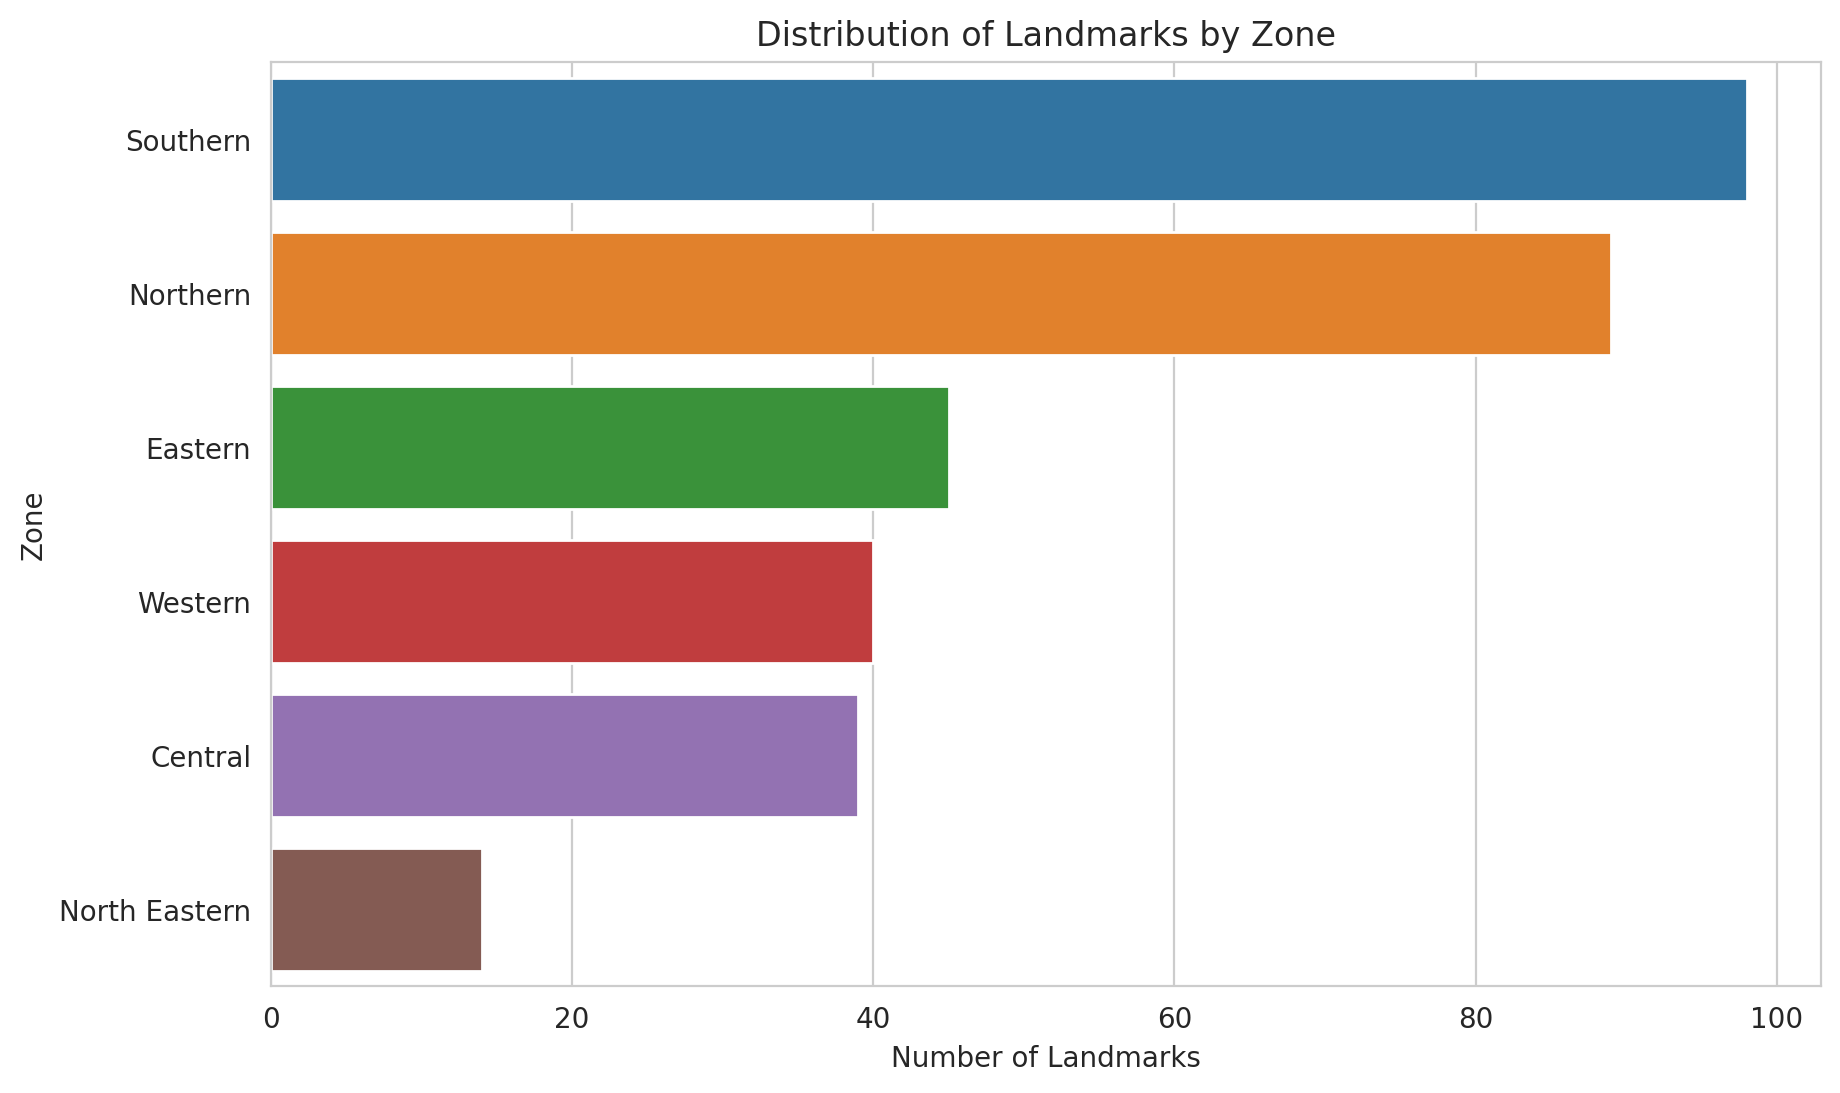

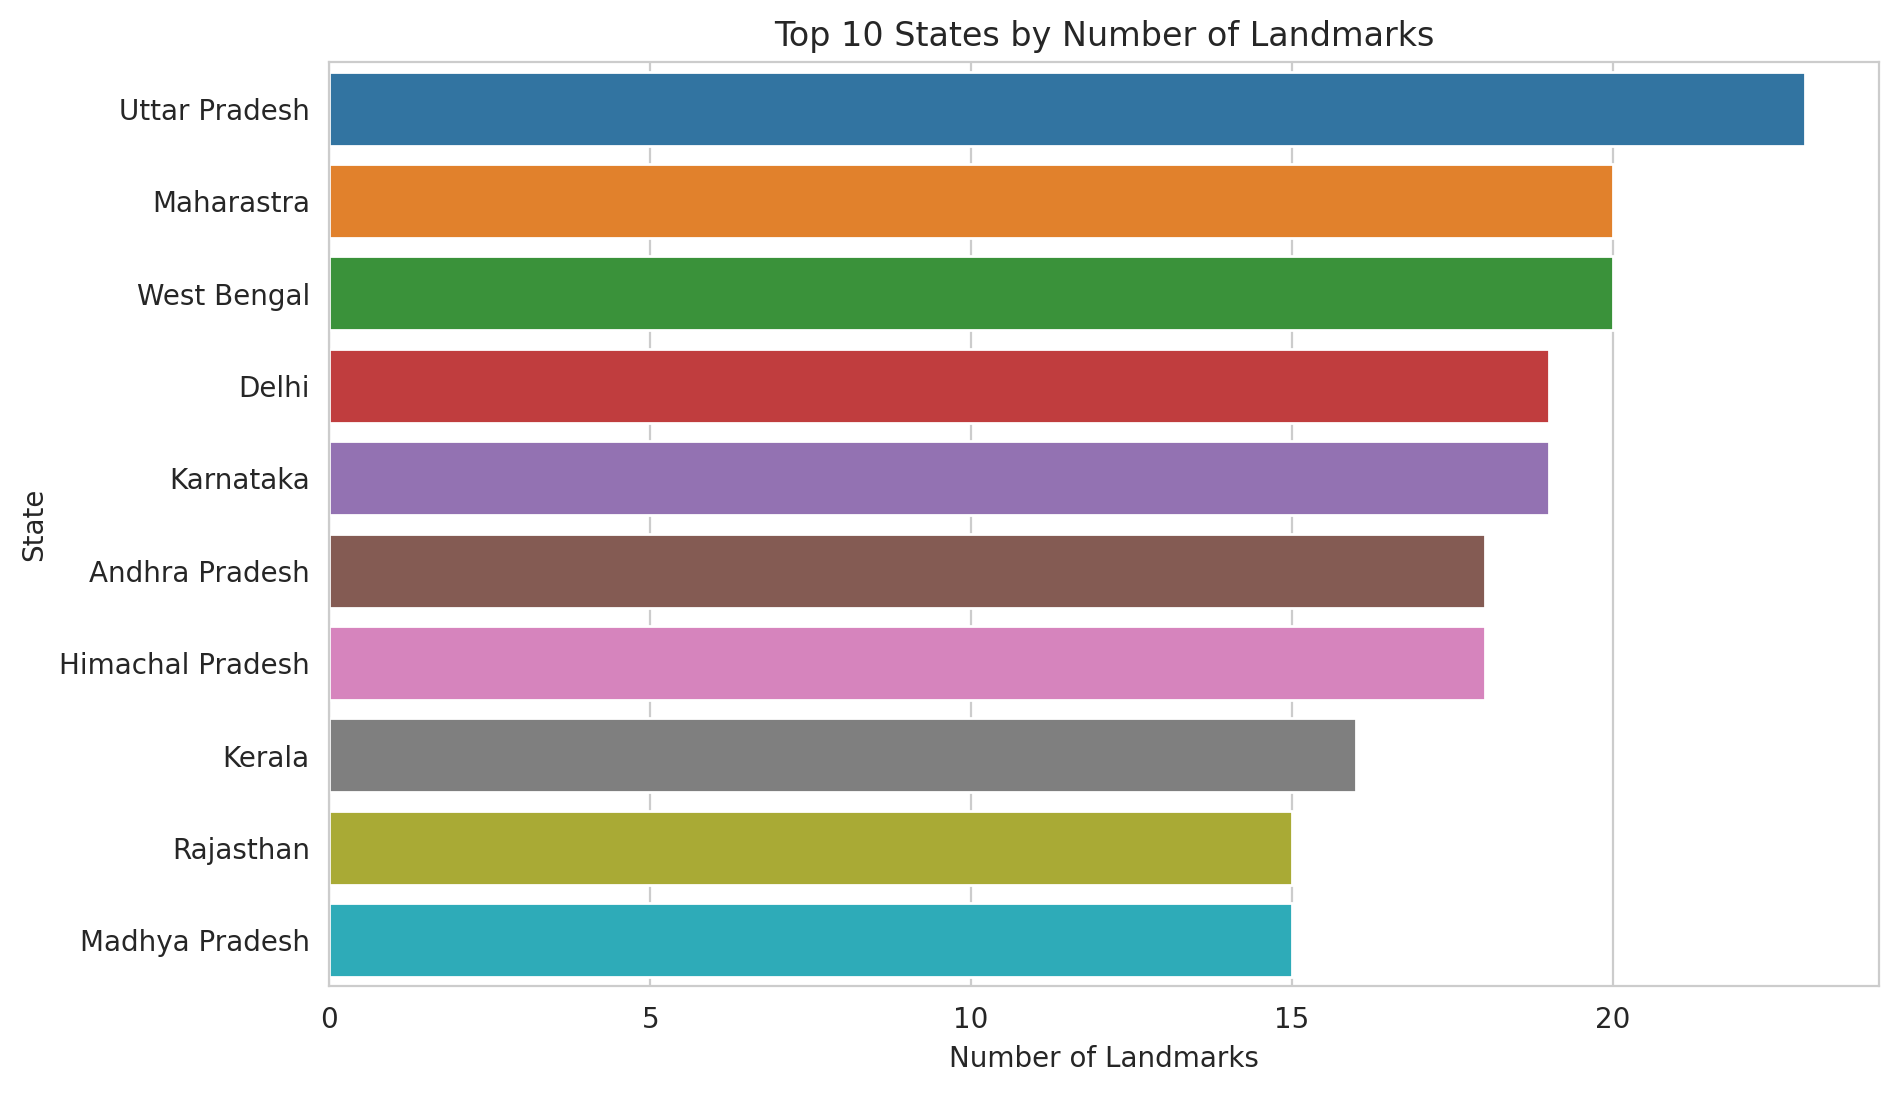

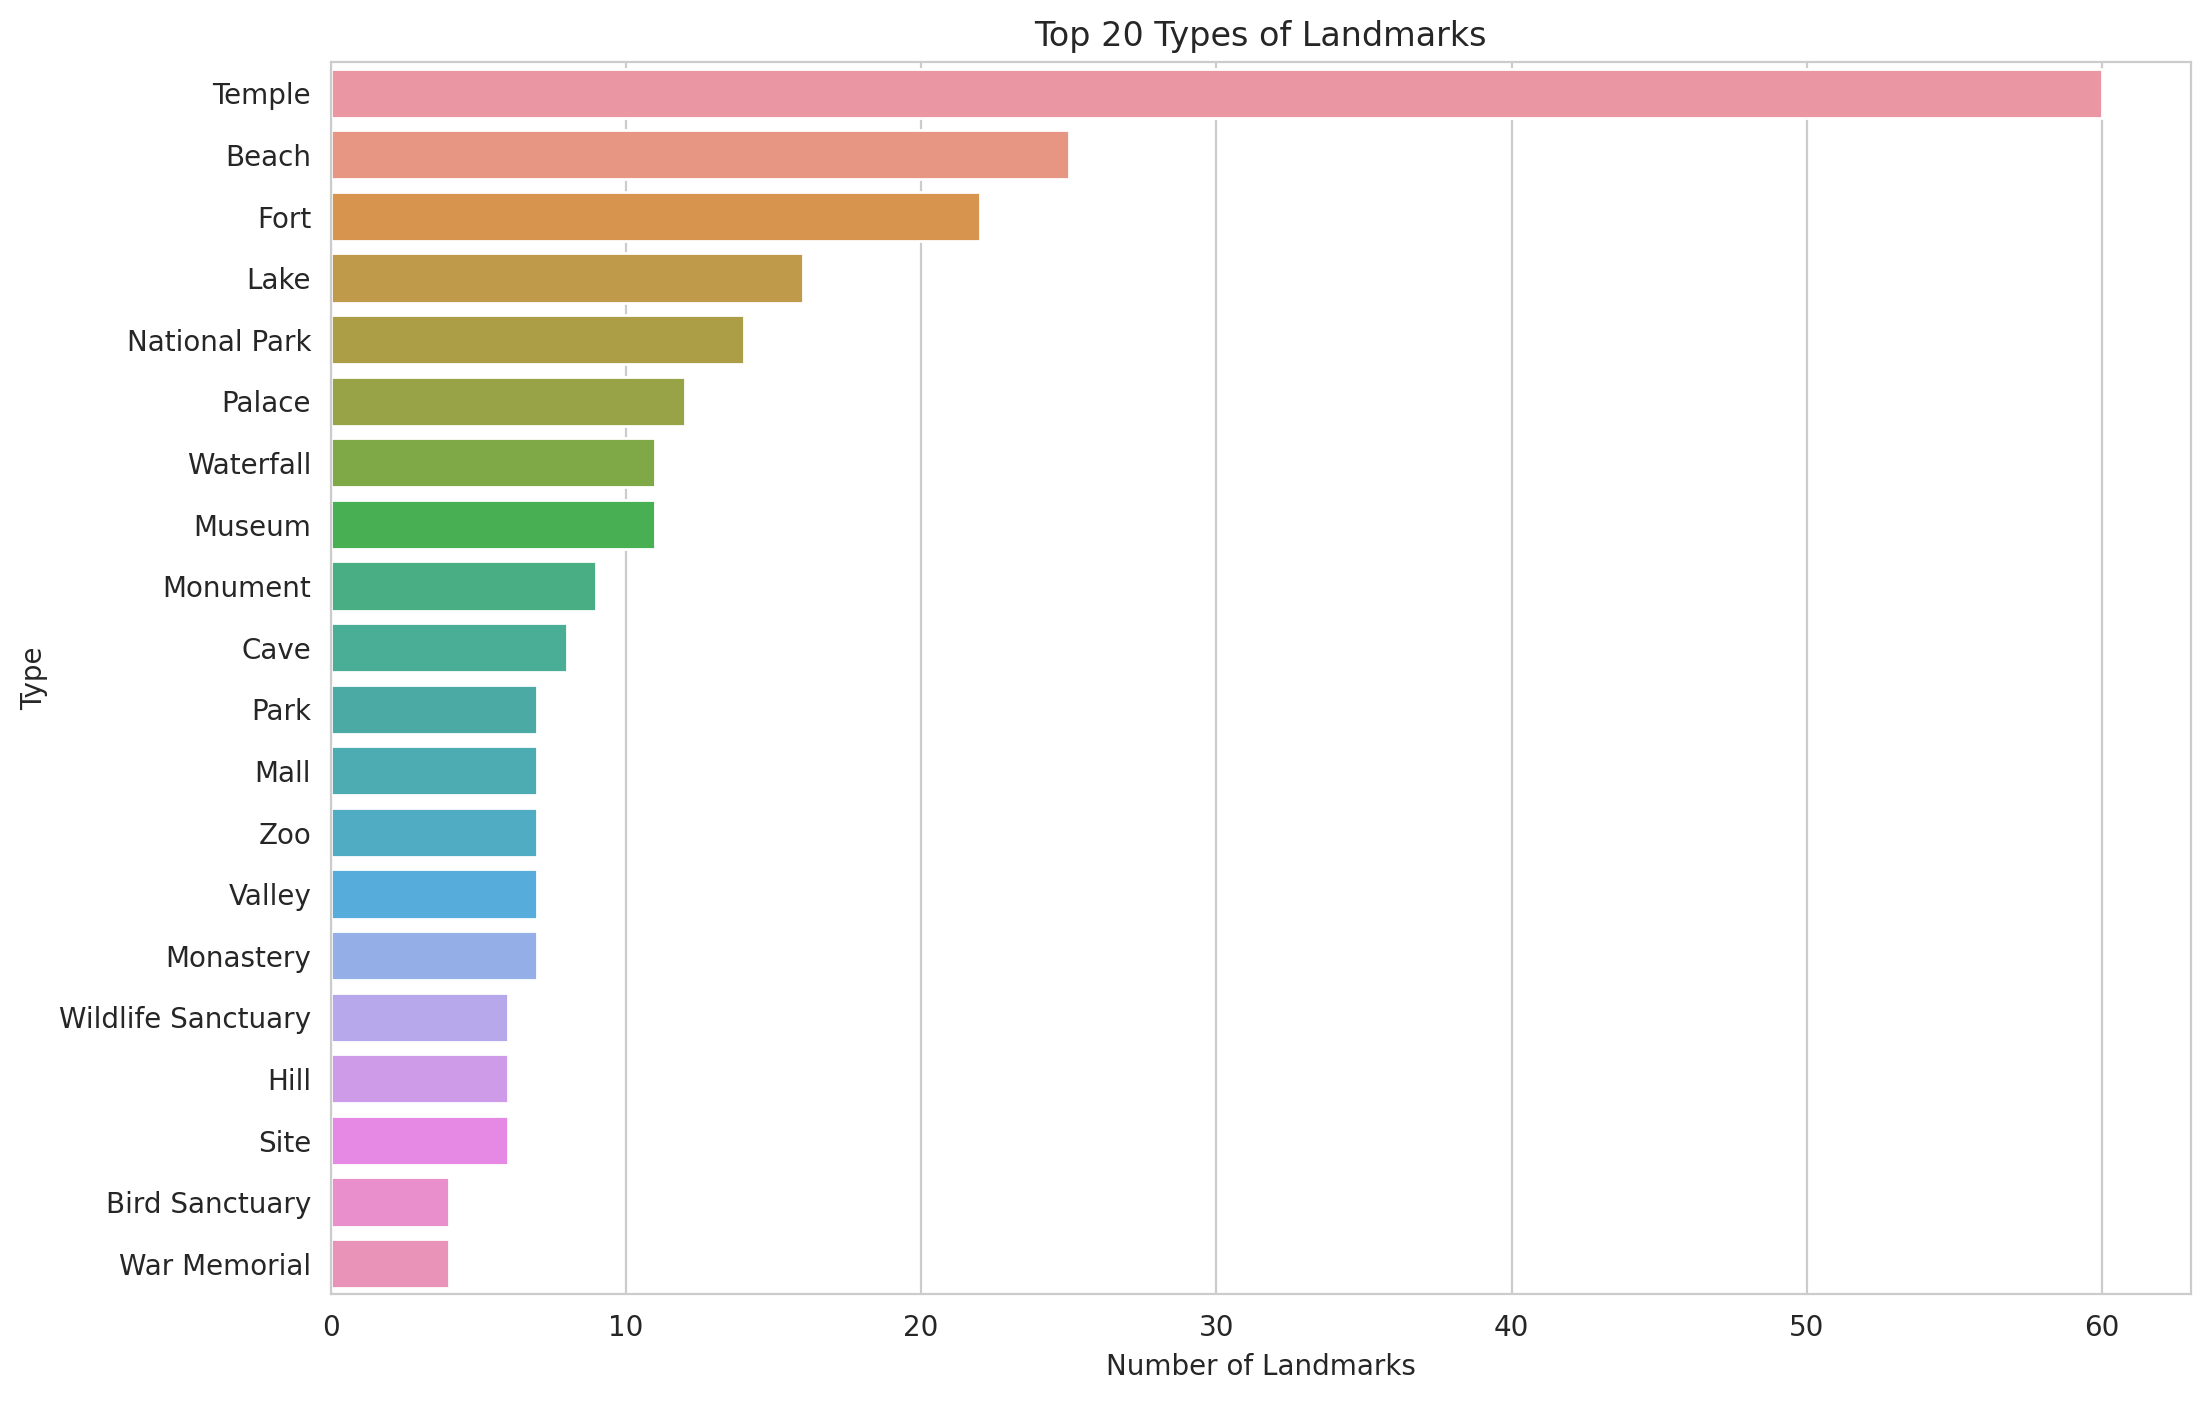

In [6]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of Landmarks by Zone
plt.figure(figsize=(10, 6), dpi=200)
sns.countplot(y='Zone', data=data_cleaned, order = data_cleaned['Zone'].value_counts().index)
plt.title('Distribution of Landmarks by Zone')
plt.xlabel('Number of Landmarks')
plt.ylabel('Zone')
plt.show()

# Distribution of Landmarks by State (Top 10)
plt.figure(figsize=(10, 6), dpi=200)
state_counts = data_cleaned['State'].value_counts().head(10)
sns.barplot(x=state_counts, y=state_counts.index)
plt.title('Top 10 States by Number of Landmarks')
plt.xlabel('Number of Landmarks')
plt.ylabel('State')
plt.show()

# Types of Landmarks
plt.figure(figsize=(12, 8), dpi=200)
type_counts = data_cleaned['Type'].value_counts().head(20)
sns.barplot(x=type_counts, y=type_counts.index)
plt.title('Top 20 Types of Landmarks')
plt.xlabel('Number of Landmarks')
plt.ylabel('Type')
plt.show()


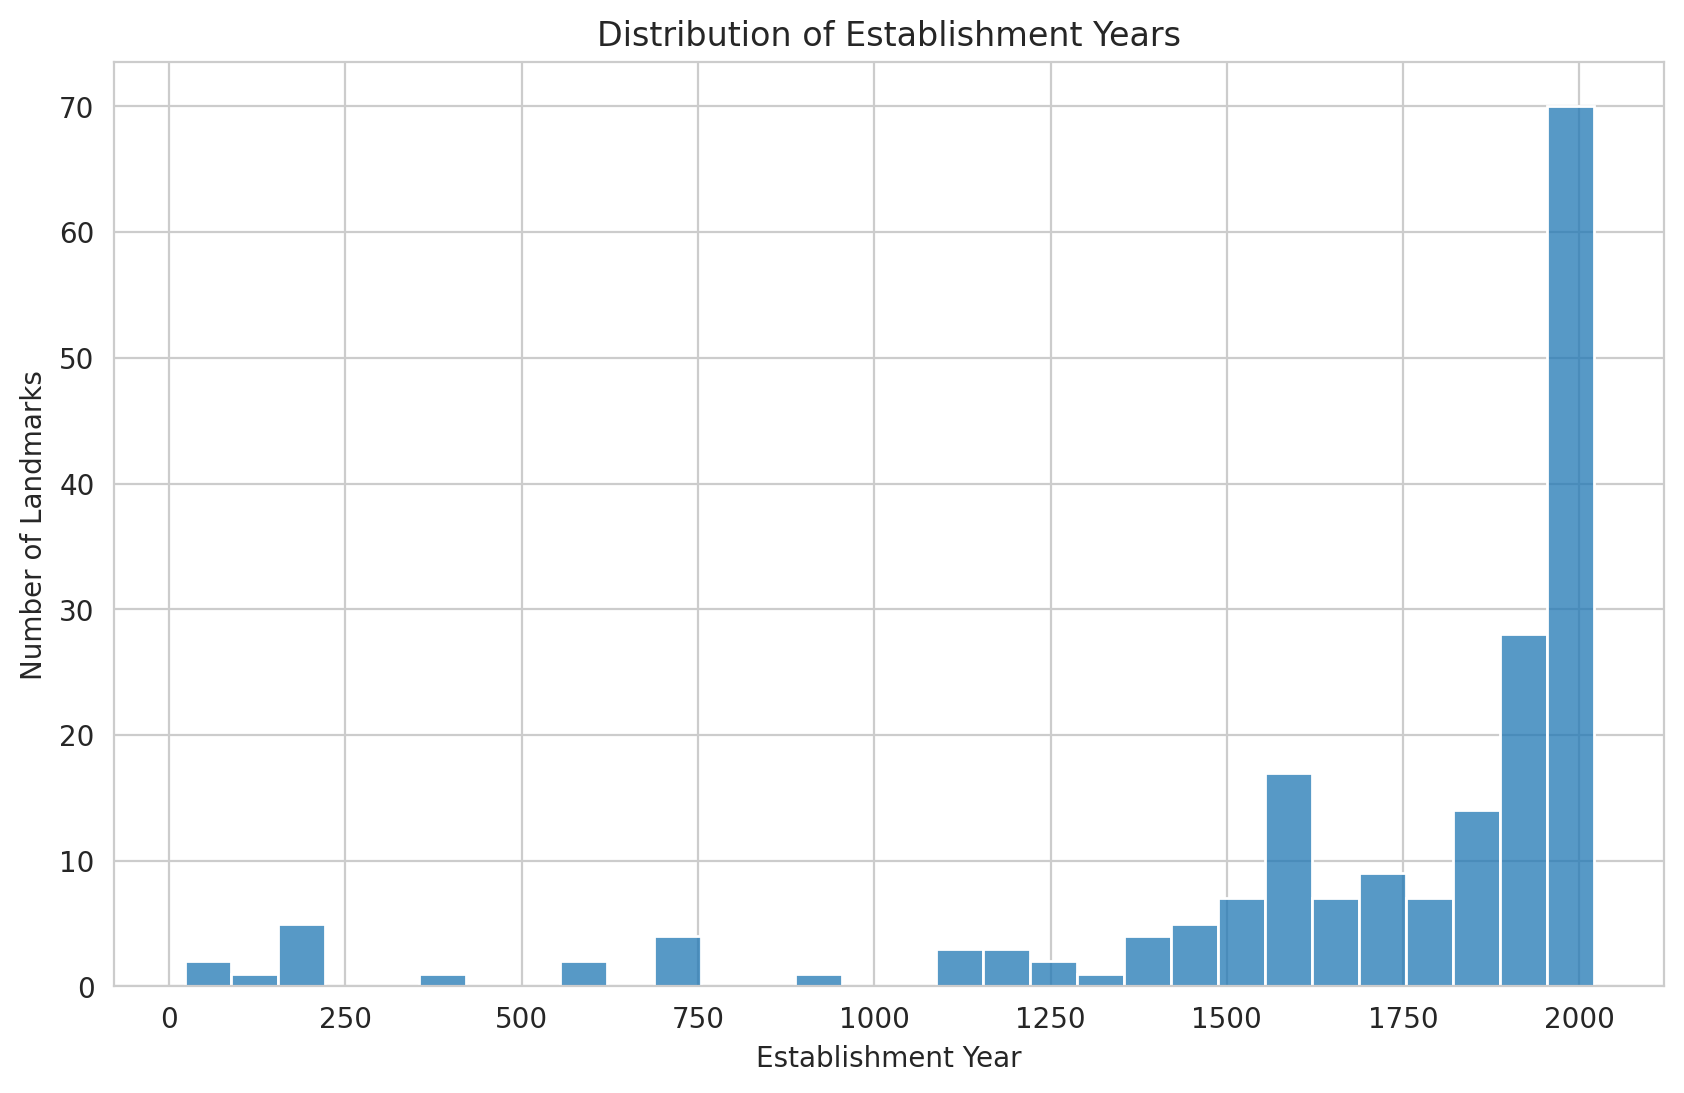

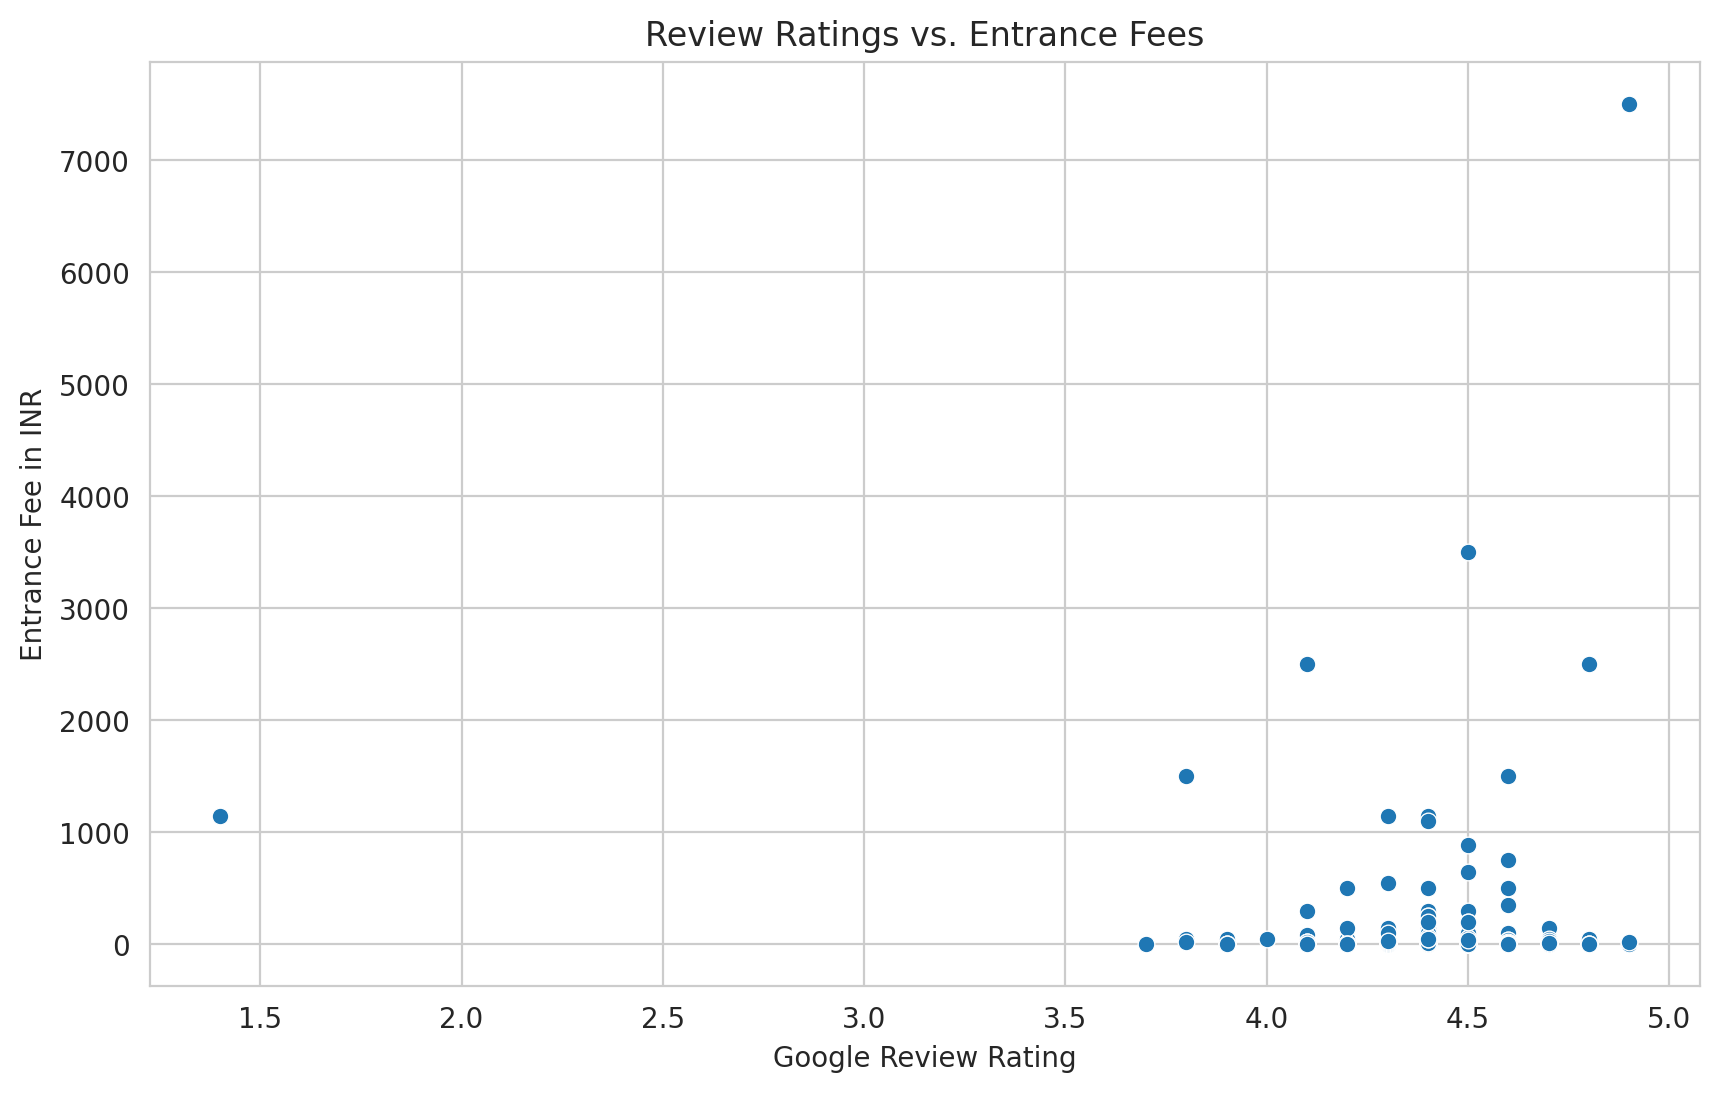

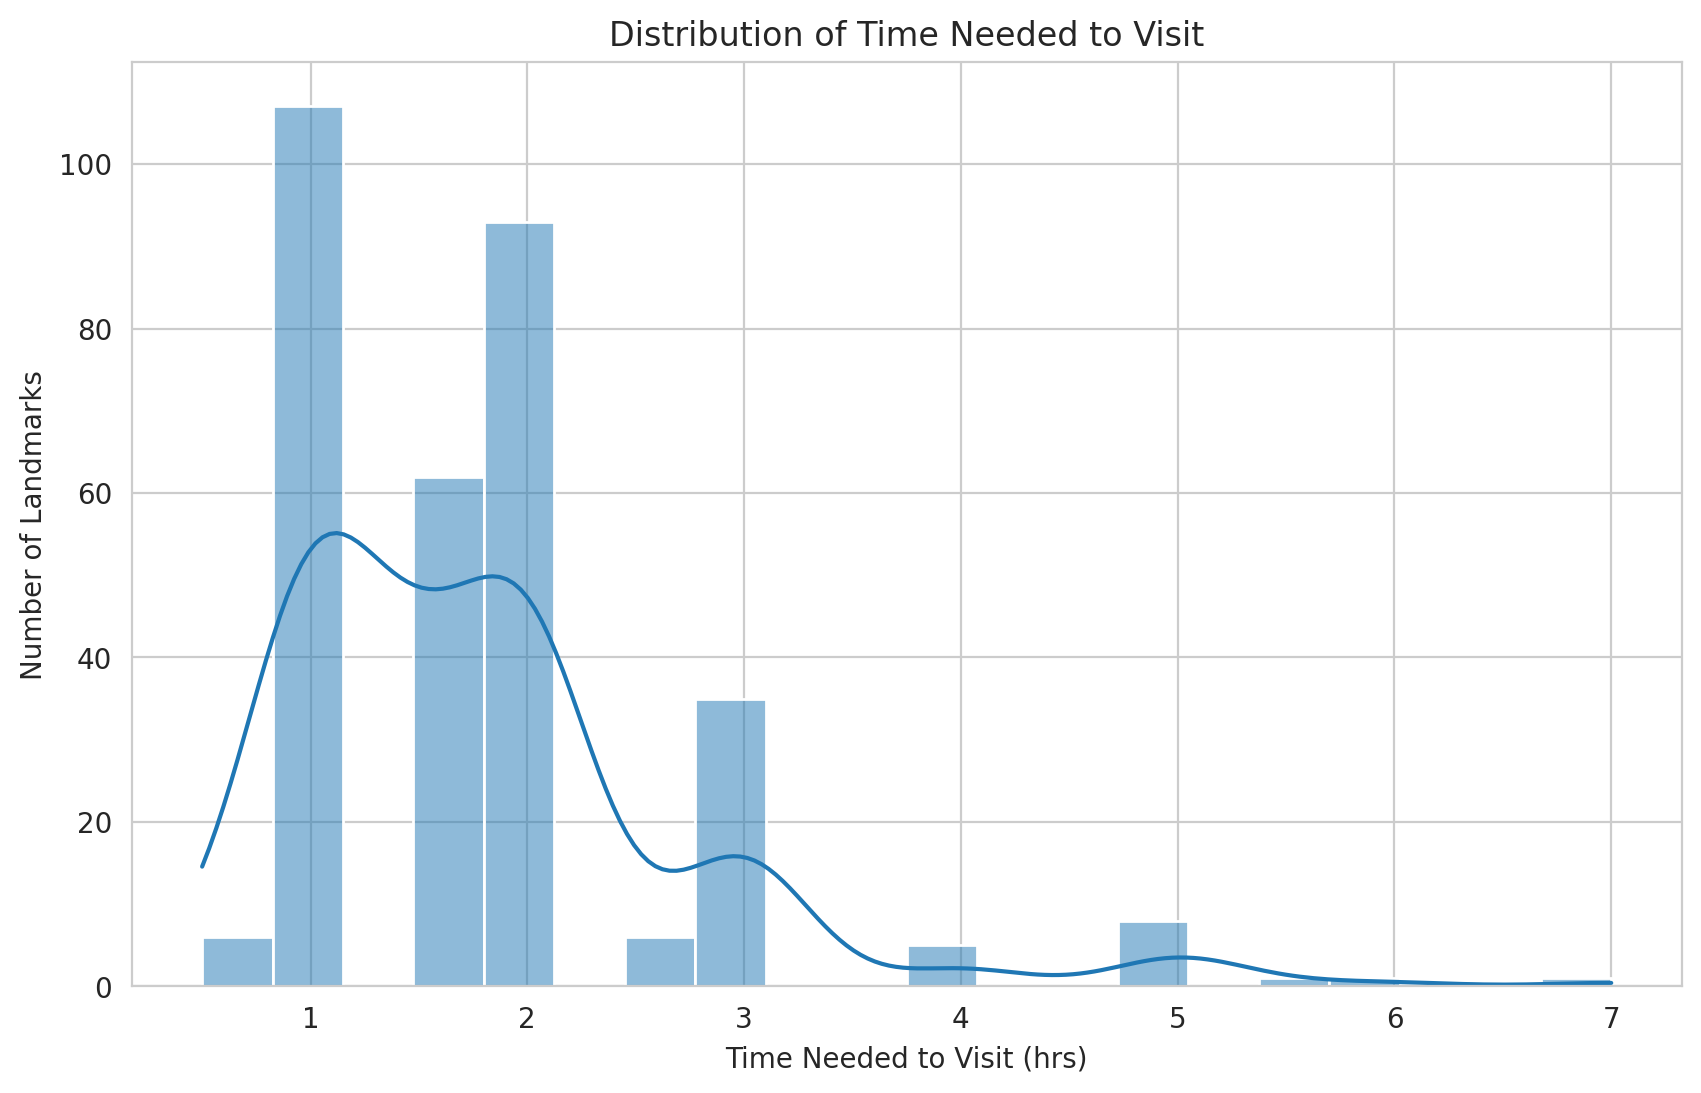

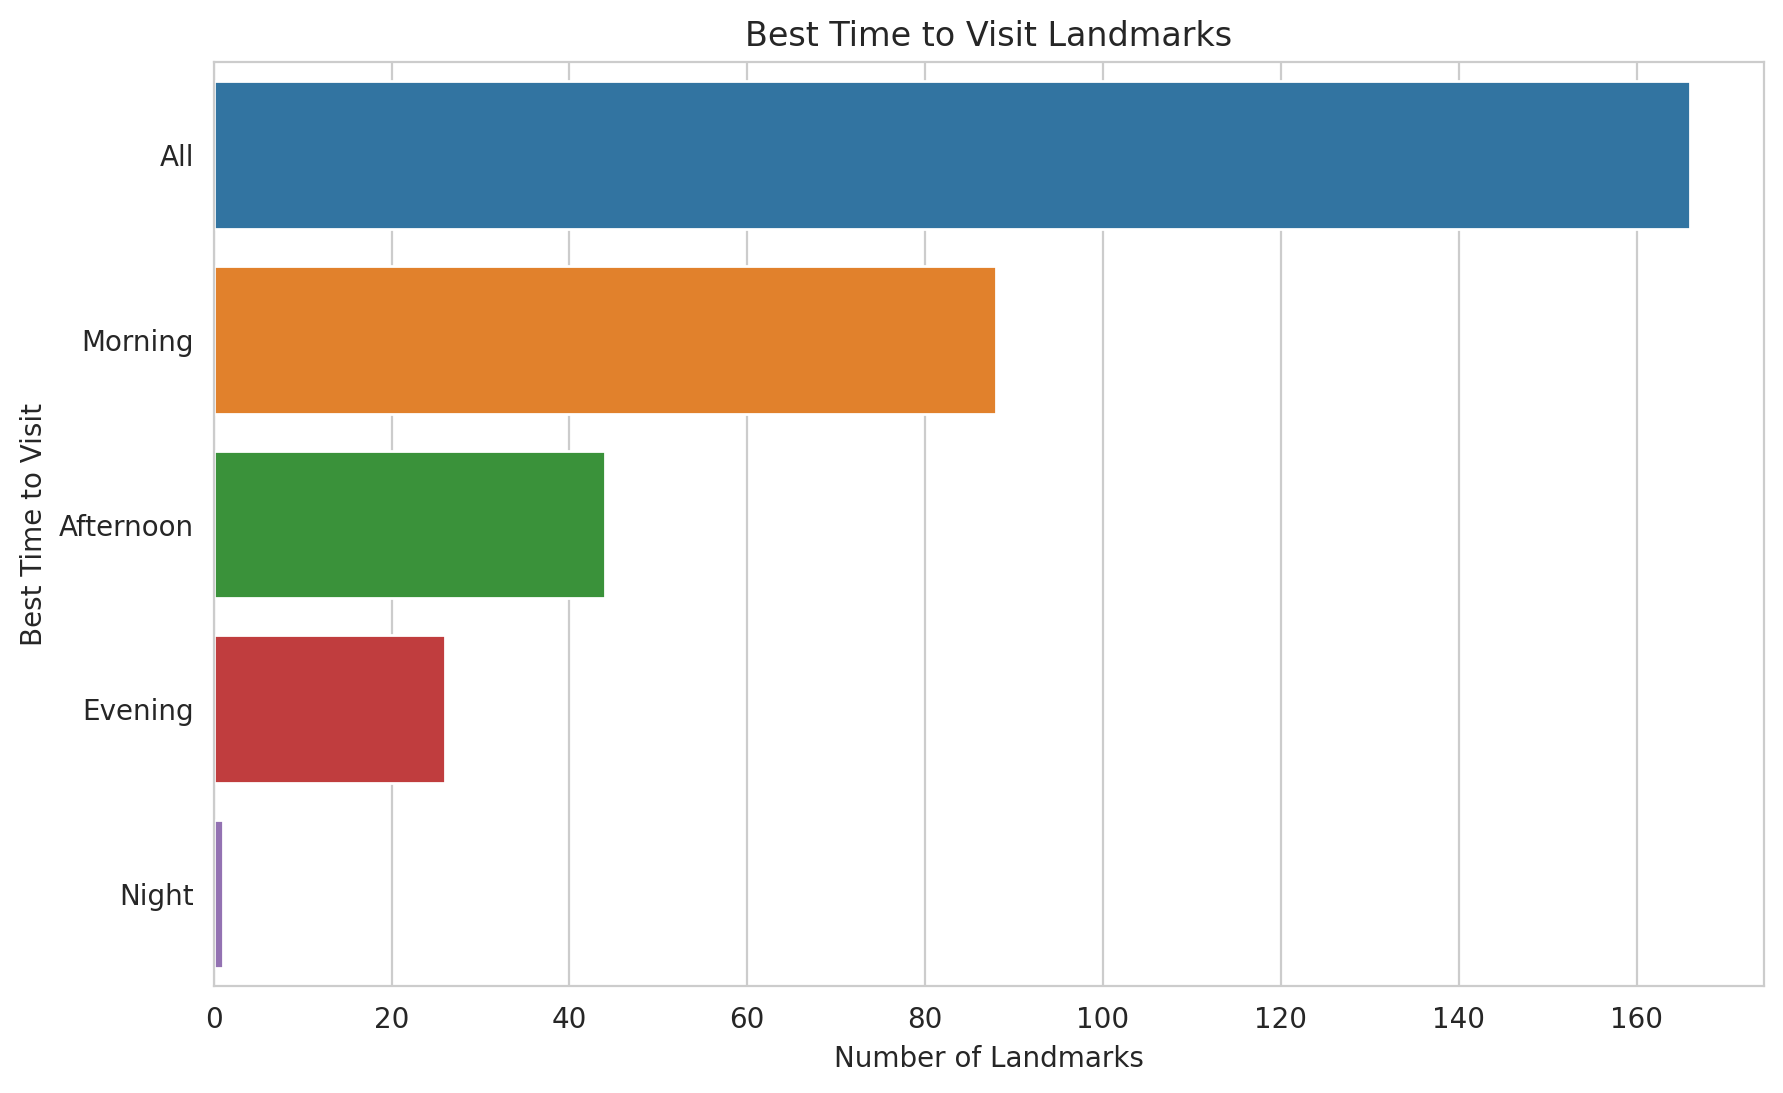

In [7]:
# 1. Establishment Year Analysis
# Filter out landmarks with missing or illogical establishment years
establishment_years_filtered = data_cleaned[data_cleaned['Establishment Year'] > 0]['Establishment Year']

plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(establishment_years_filtered, bins=30, kde=False)
plt.title('Distribution of Establishment Years')
plt.xlabel('Establishment Year')
plt.ylabel('Number of Landmarks')
plt.show()

# 2. Review Ratings and Entrance Fees
plt.figure(figsize=(10, 6),dpi=200)
sns.scatterplot(data=data_cleaned, x='Google review rating', y='Entrance Fee in INR')
plt.title('Review Ratings vs. Entrance Fees')
plt.xlabel('Google Review Rating')
plt.ylabel('Entrance Fee in INR')
plt.show()

# 3. Time Needed to Visit
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(data_cleaned['time needed to visit in hrs'], bins=20, kde=True)
plt.title('Distribution of Time Needed to Visit')
plt.xlabel('Time Needed to Visit (hrs)')
plt.ylabel('Number of Landmarks')
plt.show()

# 4. Best Time to Visit
plt.figure(figsize=(10, 6), dpi=200)
best_time_counts = data_cleaned['Best Time to visit'].value_counts()
sns.barplot(x=best_time_counts, y=best_time_counts.index)
plt.title('Best Time to Visit Landmarks')
plt.xlabel('Number of Landmarks')
plt.ylabel('Best Time to Visit')
plt.show()


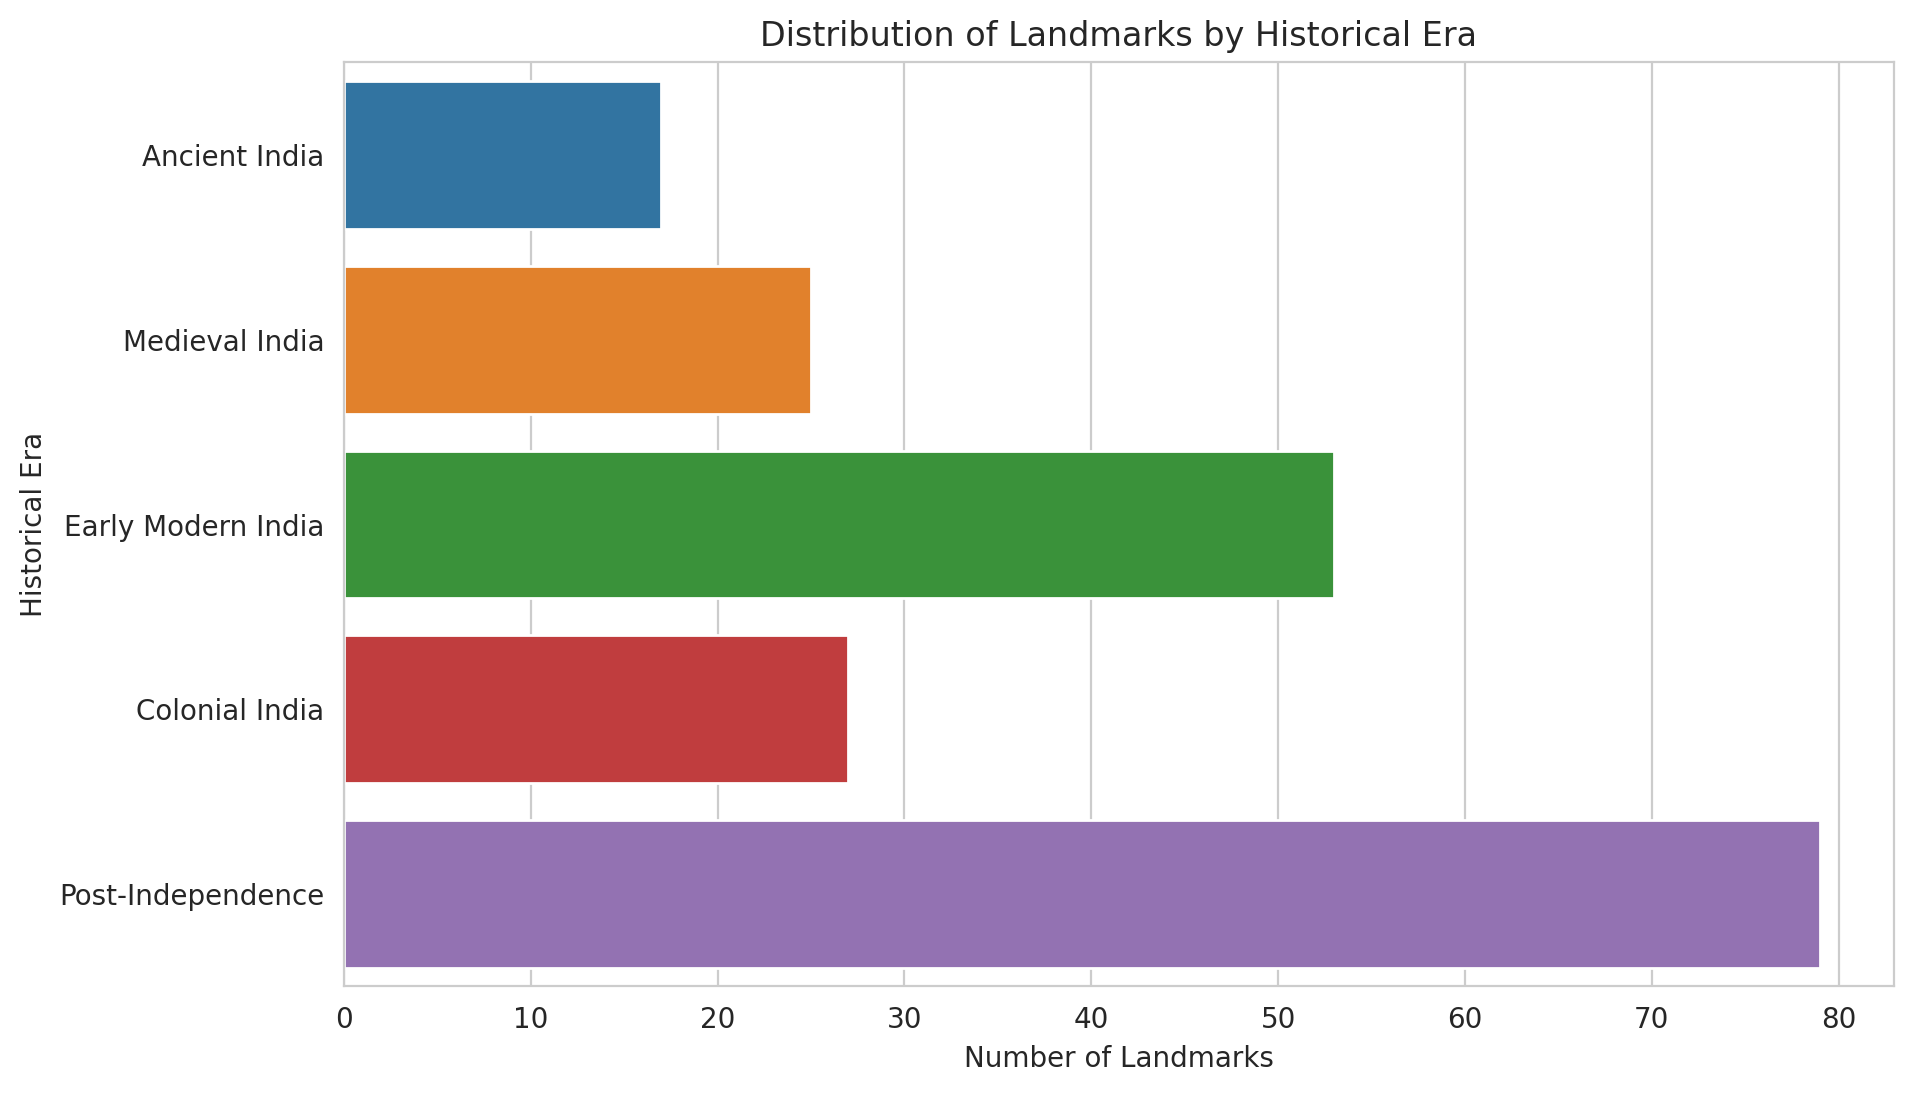

In [8]:
# Categorize landmarks into historical periods based on their establishment year
conditions = [
    (data_cleaned['Establishment Year'] <= 500),
    (data_cleaned['Establishment Year'] > 500) & (data_cleaned['Establishment Year'] <= 1500),
    (data_cleaned['Establishment Year'] > 1500) & (data_cleaned['Establishment Year'] <= 1857),
    (data_cleaned['Establishment Year'] > 1857) & (data_cleaned['Establishment Year'] <= 1947),
    (data_cleaned['Establishment Year'] > 1947)
]
choices = ['Ancient India', 'Medieval India', 'Early Modern India', 'Colonial India', 'Post-Independence']

data_cleaned['Historical Era'] = pd.cut(data_cleaned['Establishment Year'], bins=[-float("inf"), 500, 1500, 1857, 1947, float("inf")], labels=choices, right=False)

# Overview of landmarks by historical era
era_distribution = data_cleaned['Historical Era'].value_counts()

# Visualize the distribution of landmarks by historical era
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=era_distribution, y=era_distribution.index)
plt.title('Distribution of Landmarks by Historical Era')
plt.xlabel('Number of Landmarks')
plt.ylabel('Historical Era')
plt.show()


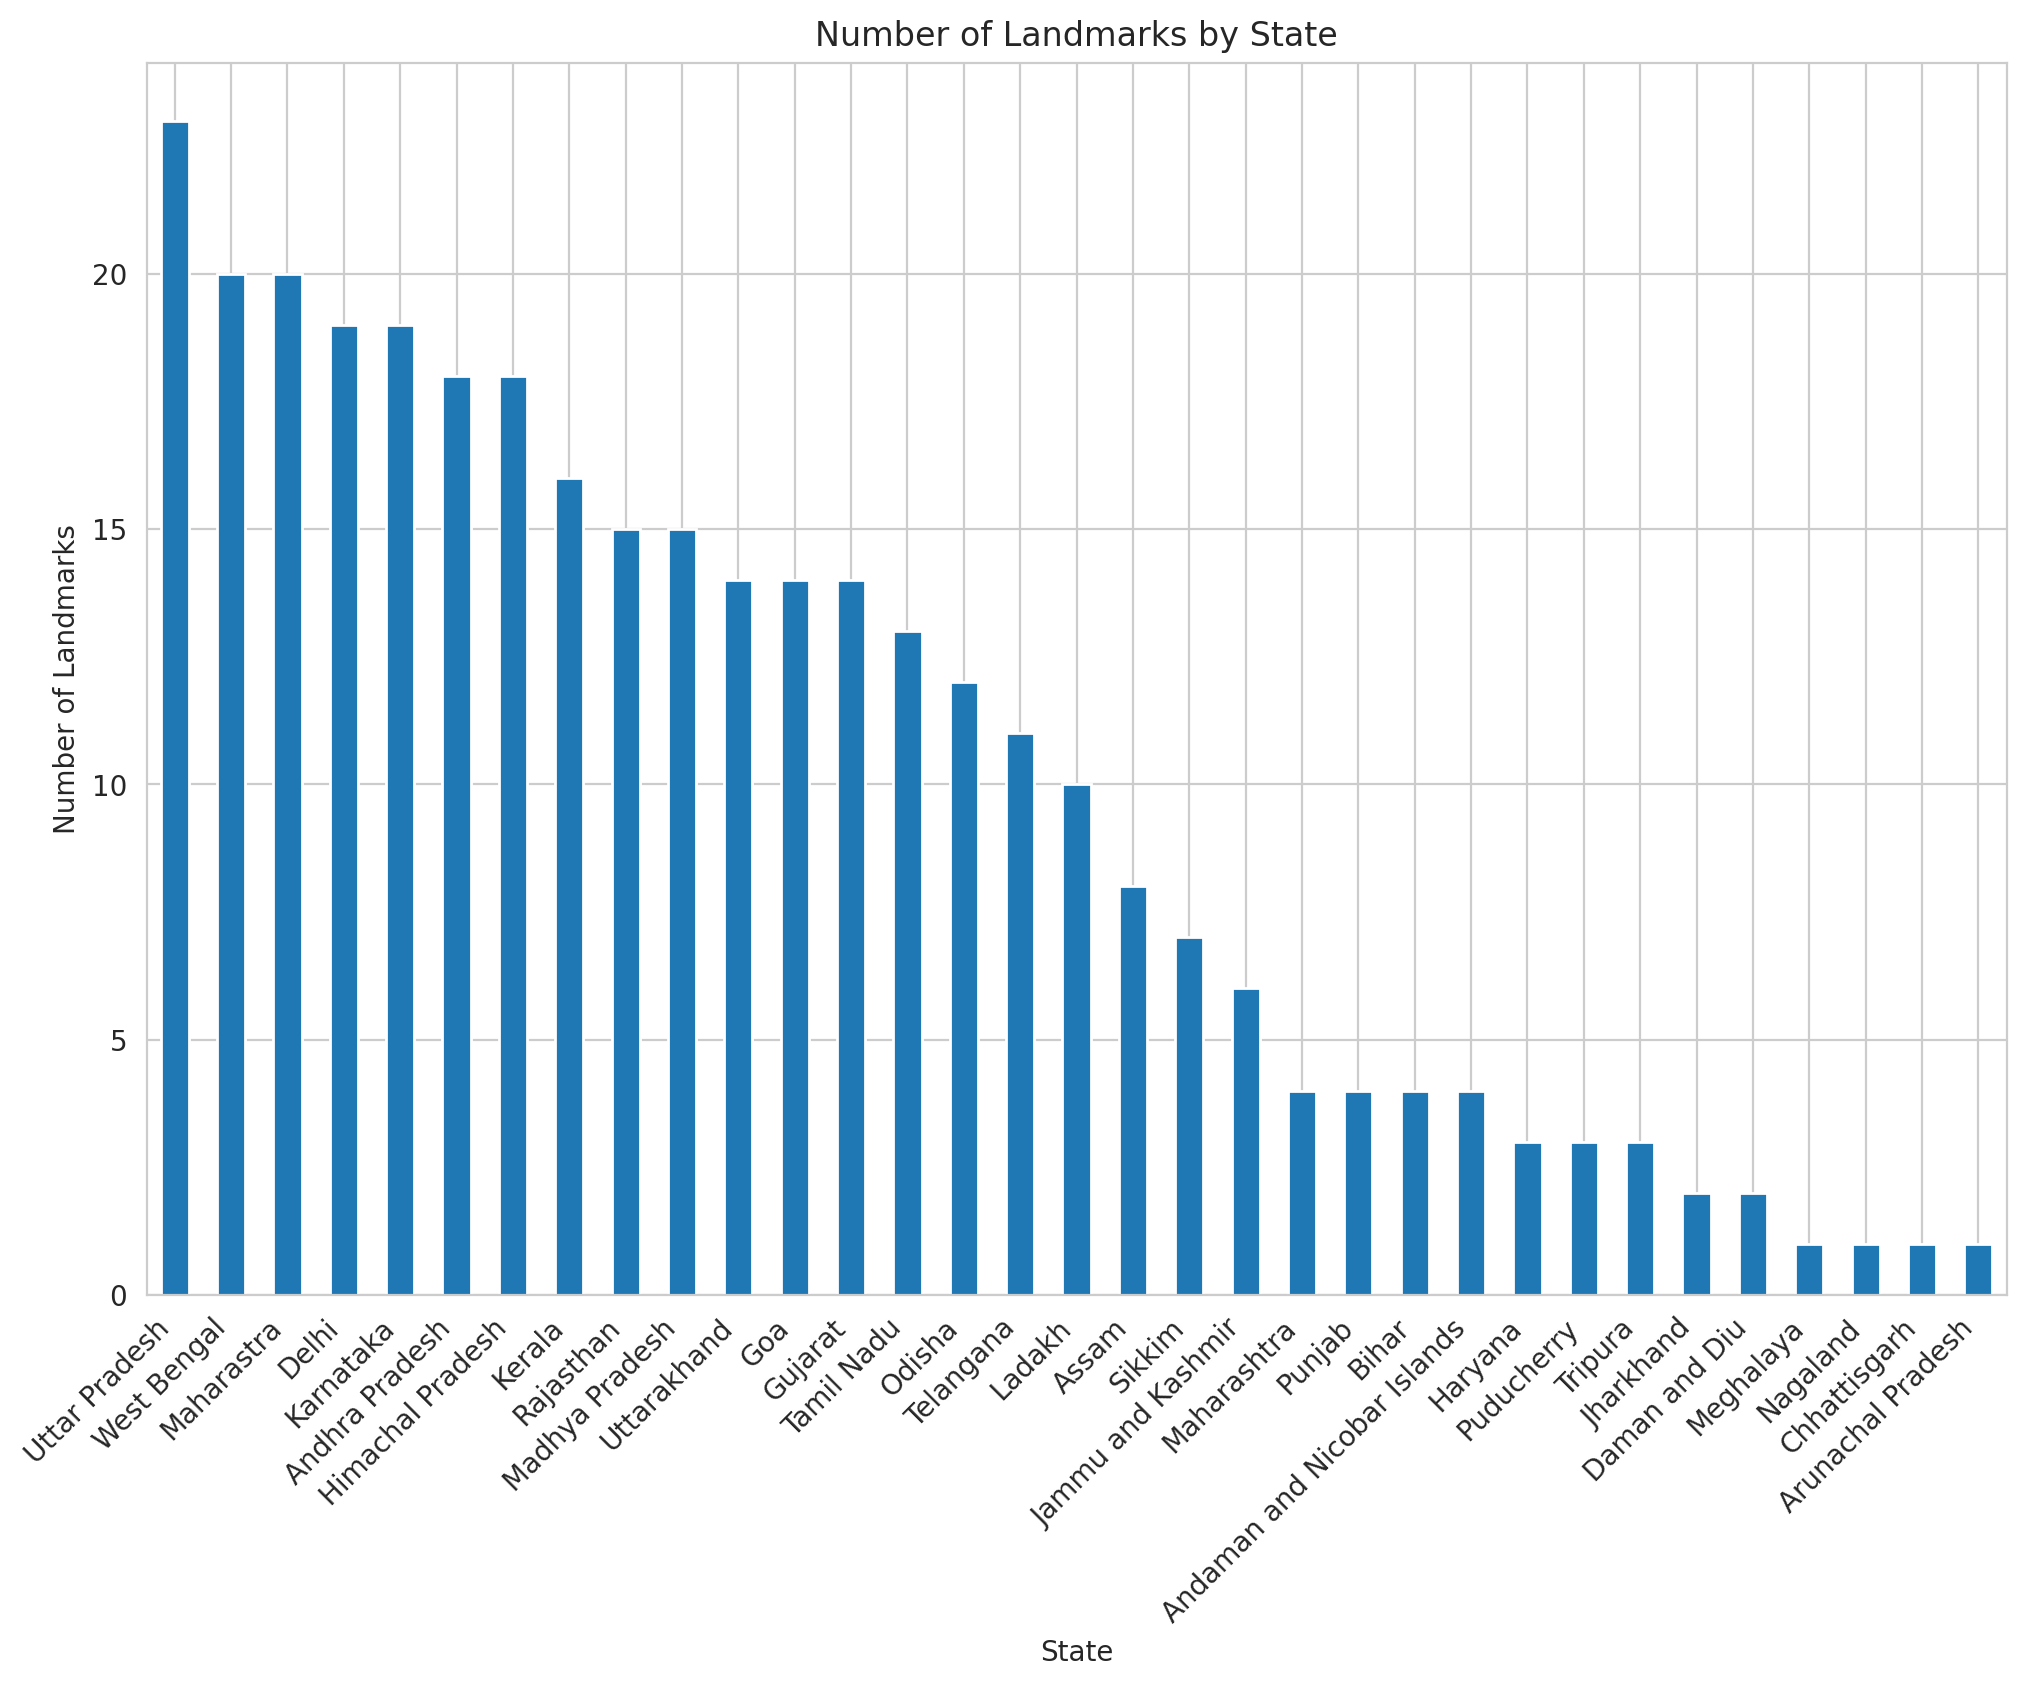

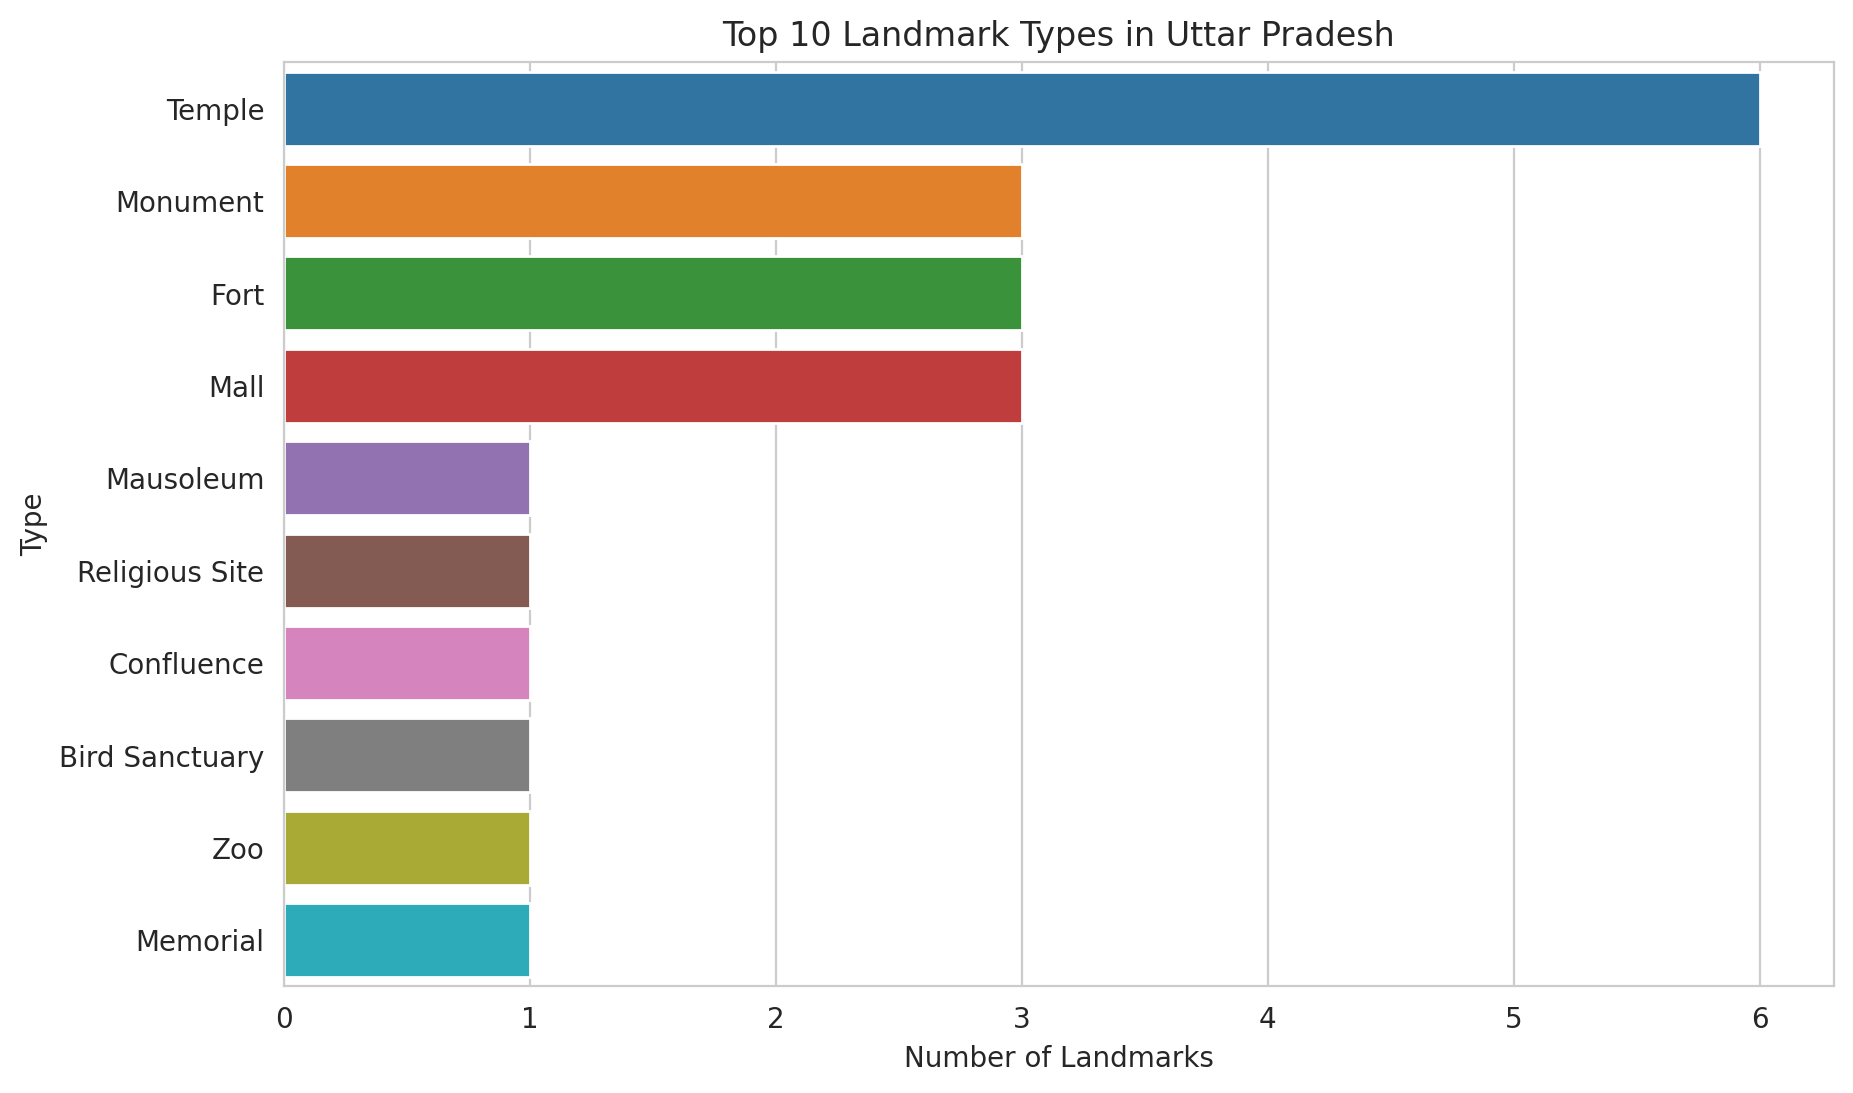

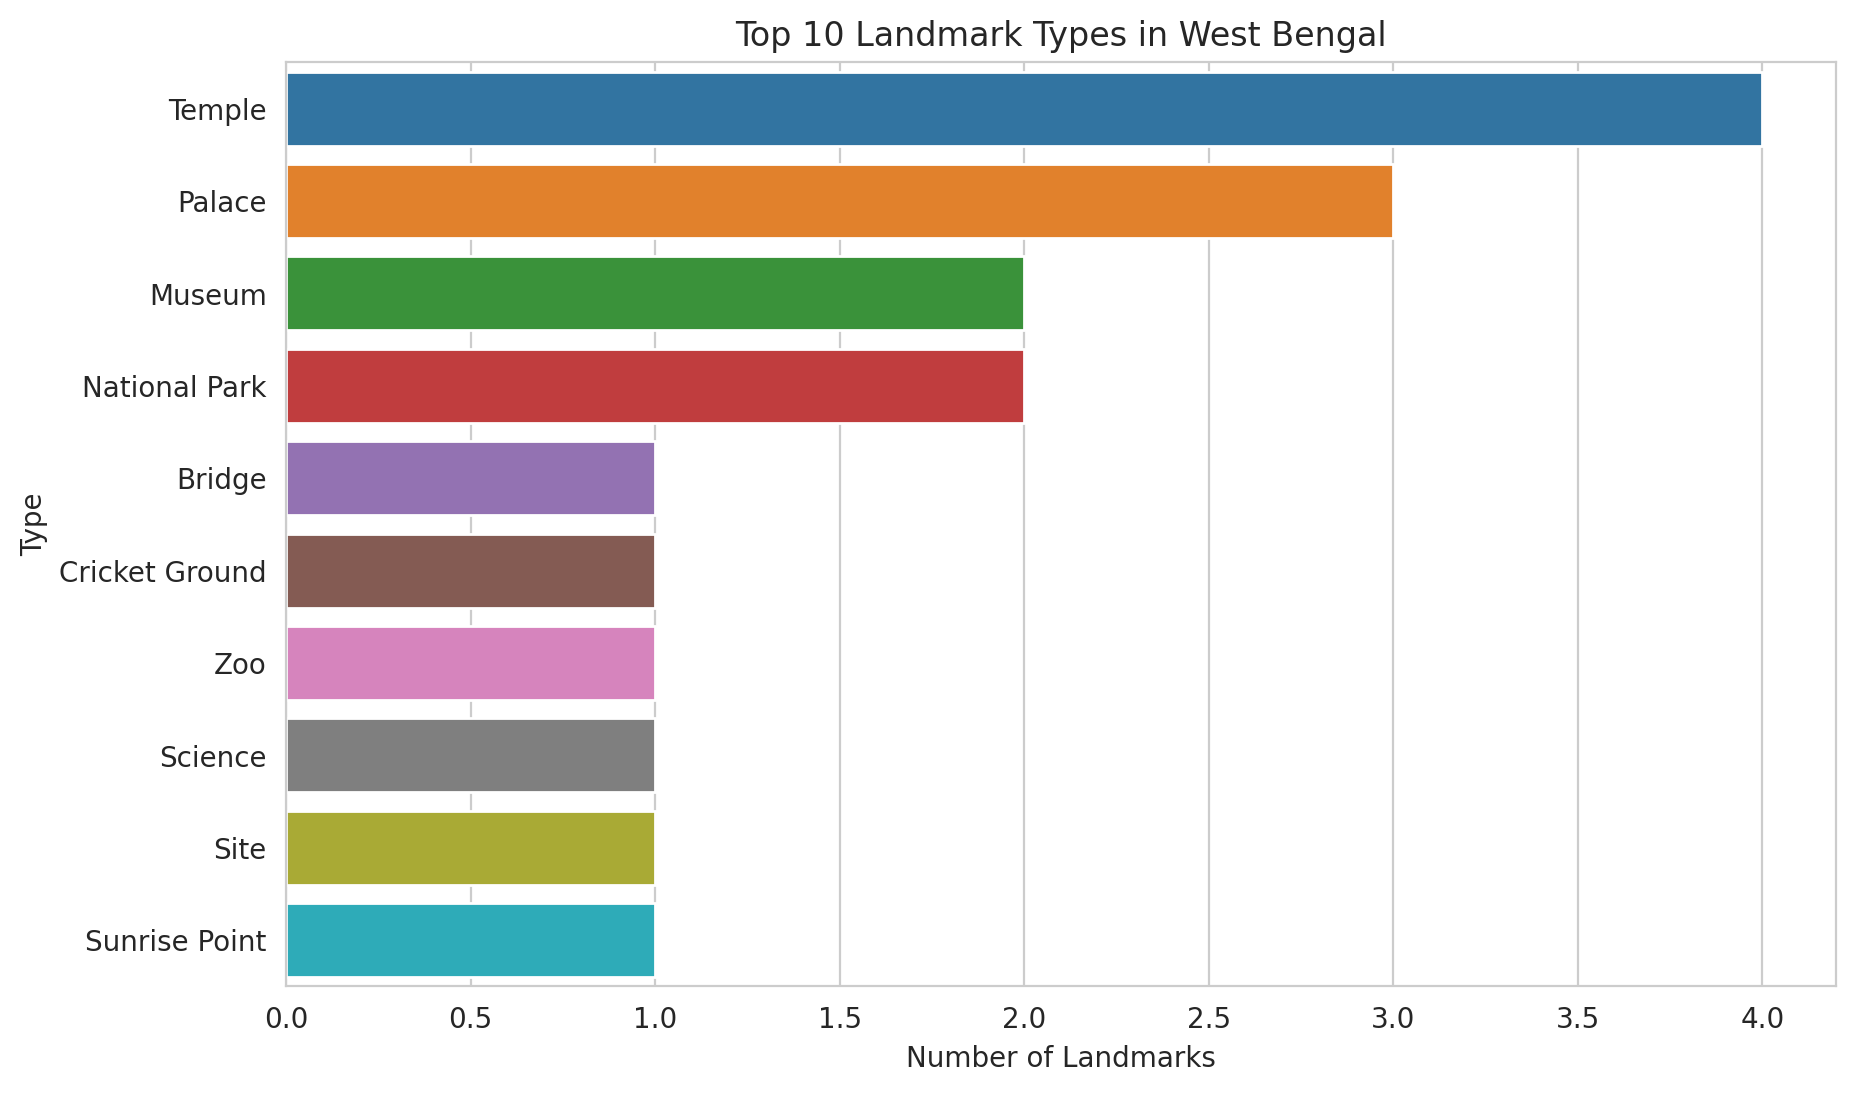

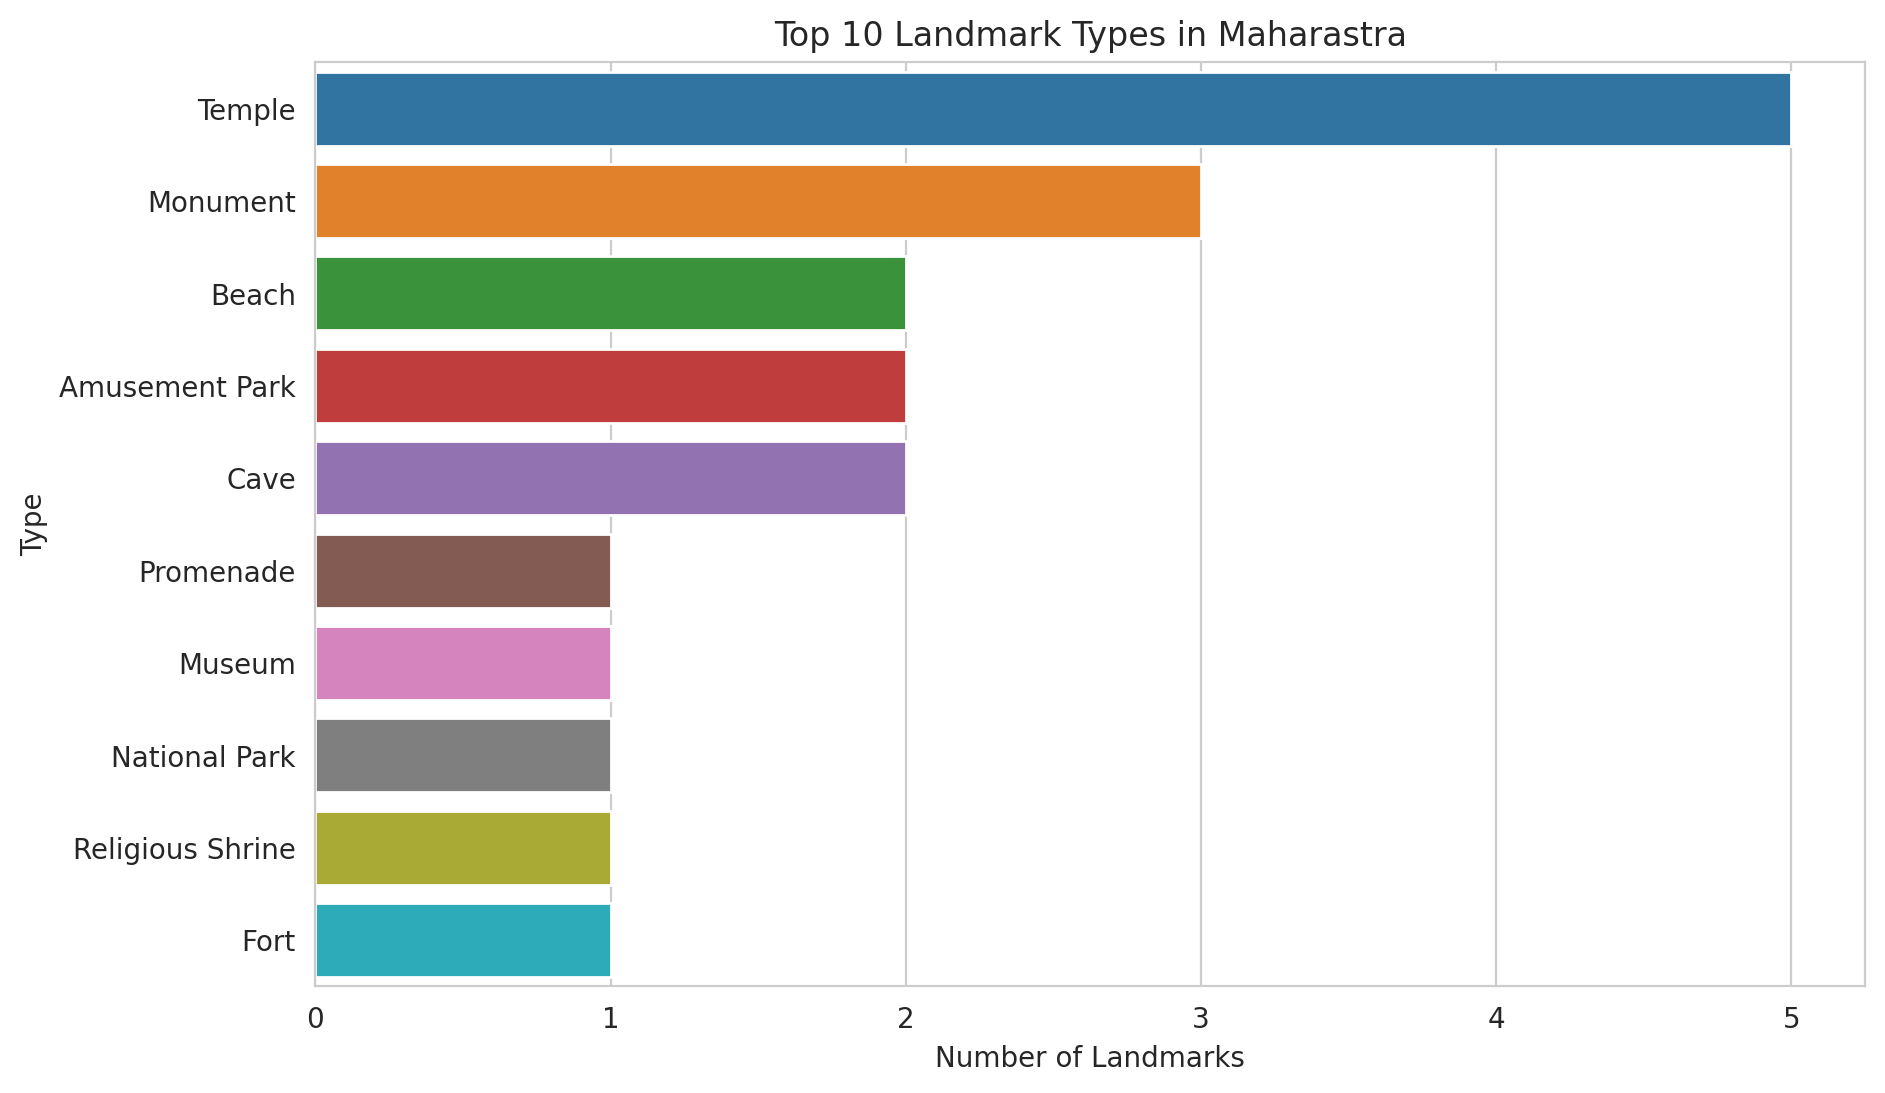

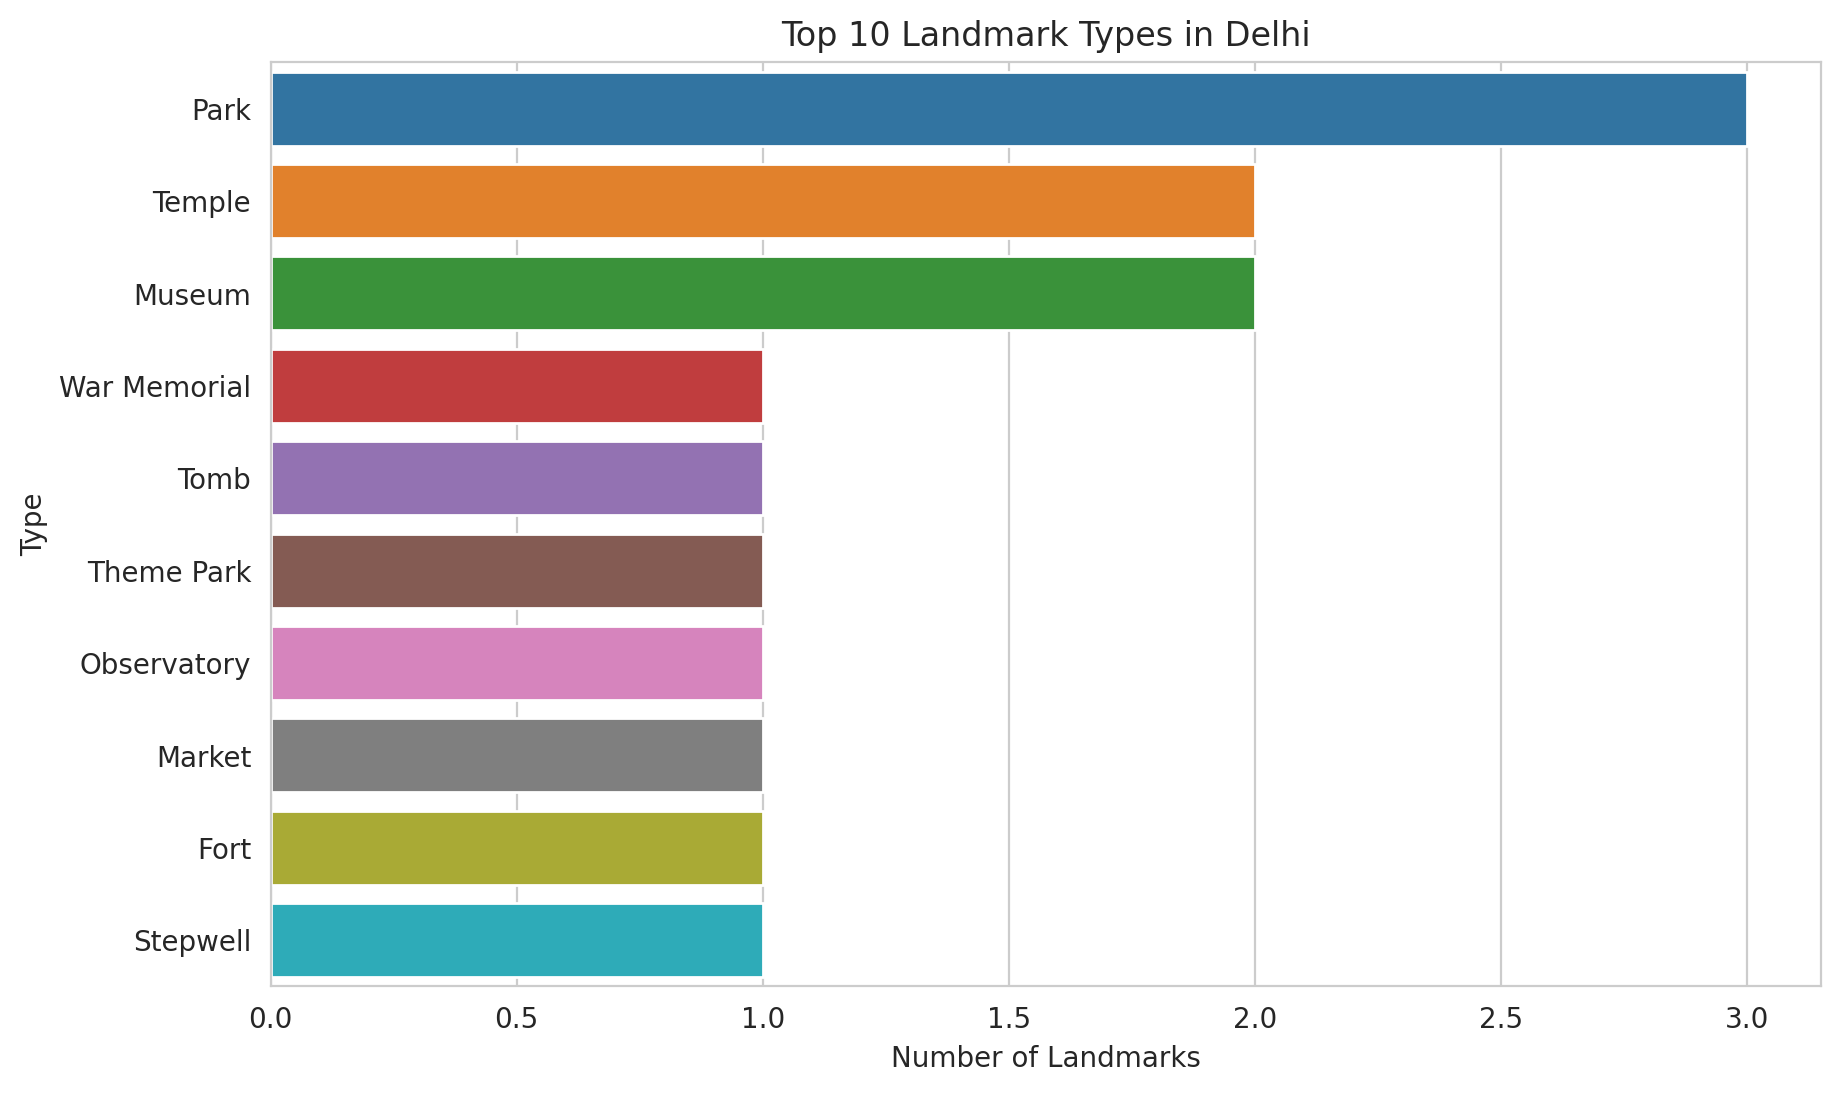

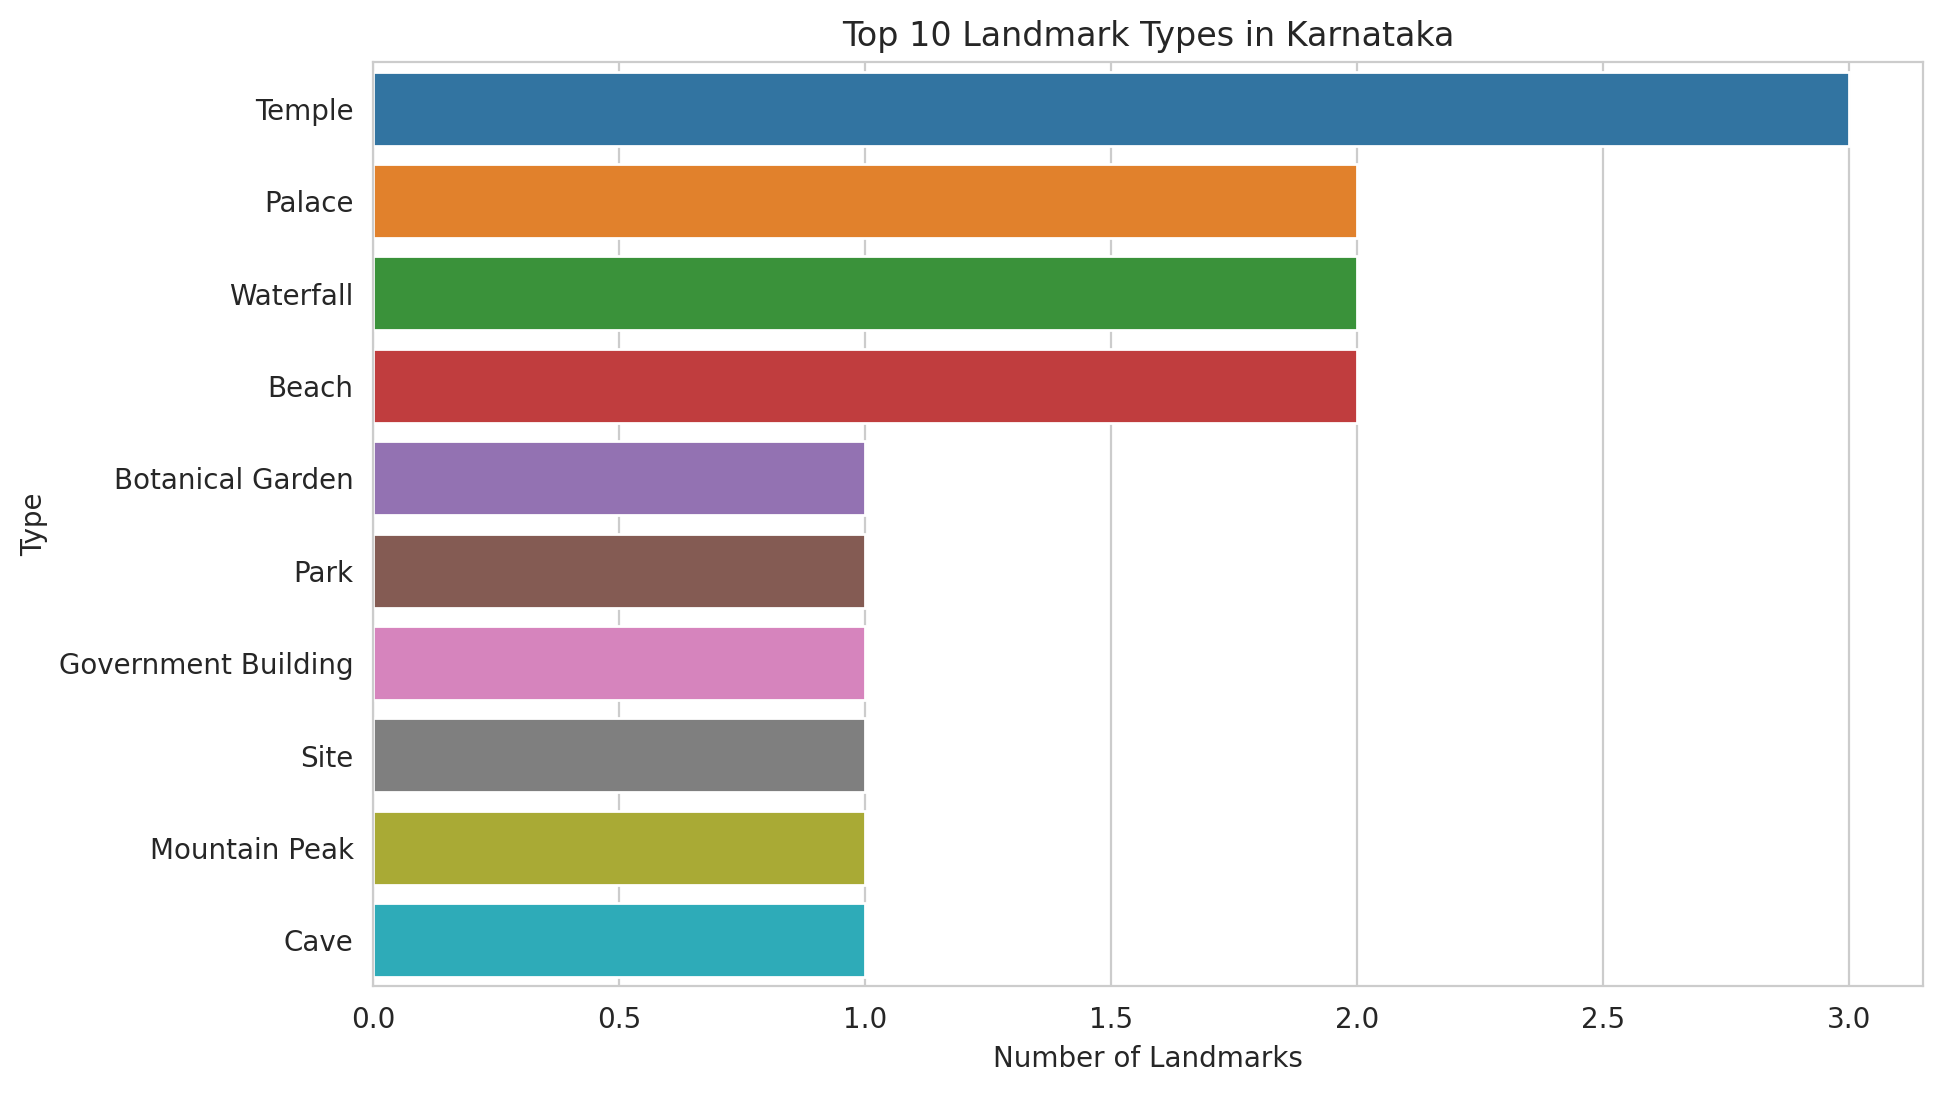

In [9]:
# 1. Number of Landmarks by State
landmarks_by_state = data_cleaned.groupby('State')['Name'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 8), dpi=200)
landmarks_by_state.plot(kind='bar')
plt.title('Number of Landmarks by State')
plt.xlabel('State')
plt.ylabel('Number of Landmarks')
plt.xticks(rotation=45, ha="right")
plt.show()

# 2. Types of Landmarks by State (Top 5 States)
top_5_states = landmarks_by_state.head(5).index
for state in top_5_states:
    plt.figure(figsize=(10, 6), dpi=200)
    state_data = data_cleaned[data_cleaned['State'] == state]
    state_types_count = state_data['Type'].value_counts().head(10)
    sns.barplot(x=state_types_count, y=state_types_count.index)
    plt.title(f'Top 10 Landmark Types in {state}')
    plt.xlabel('Number of Landmarks')
    plt.ylabel('Type')
    plt.show()


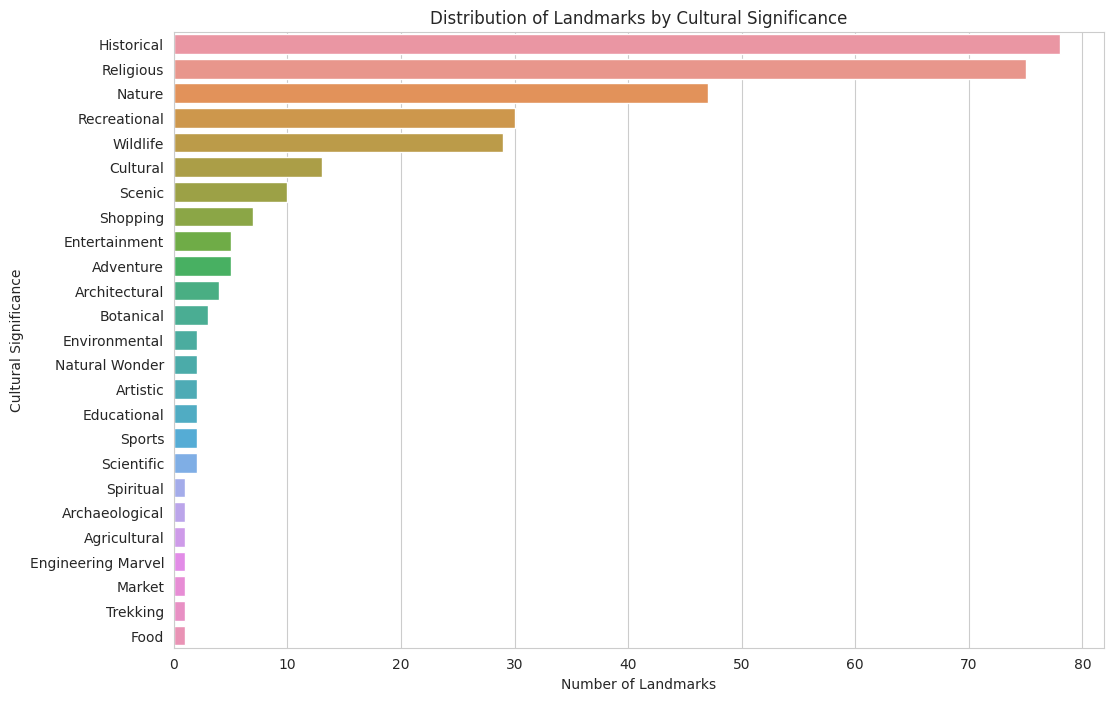

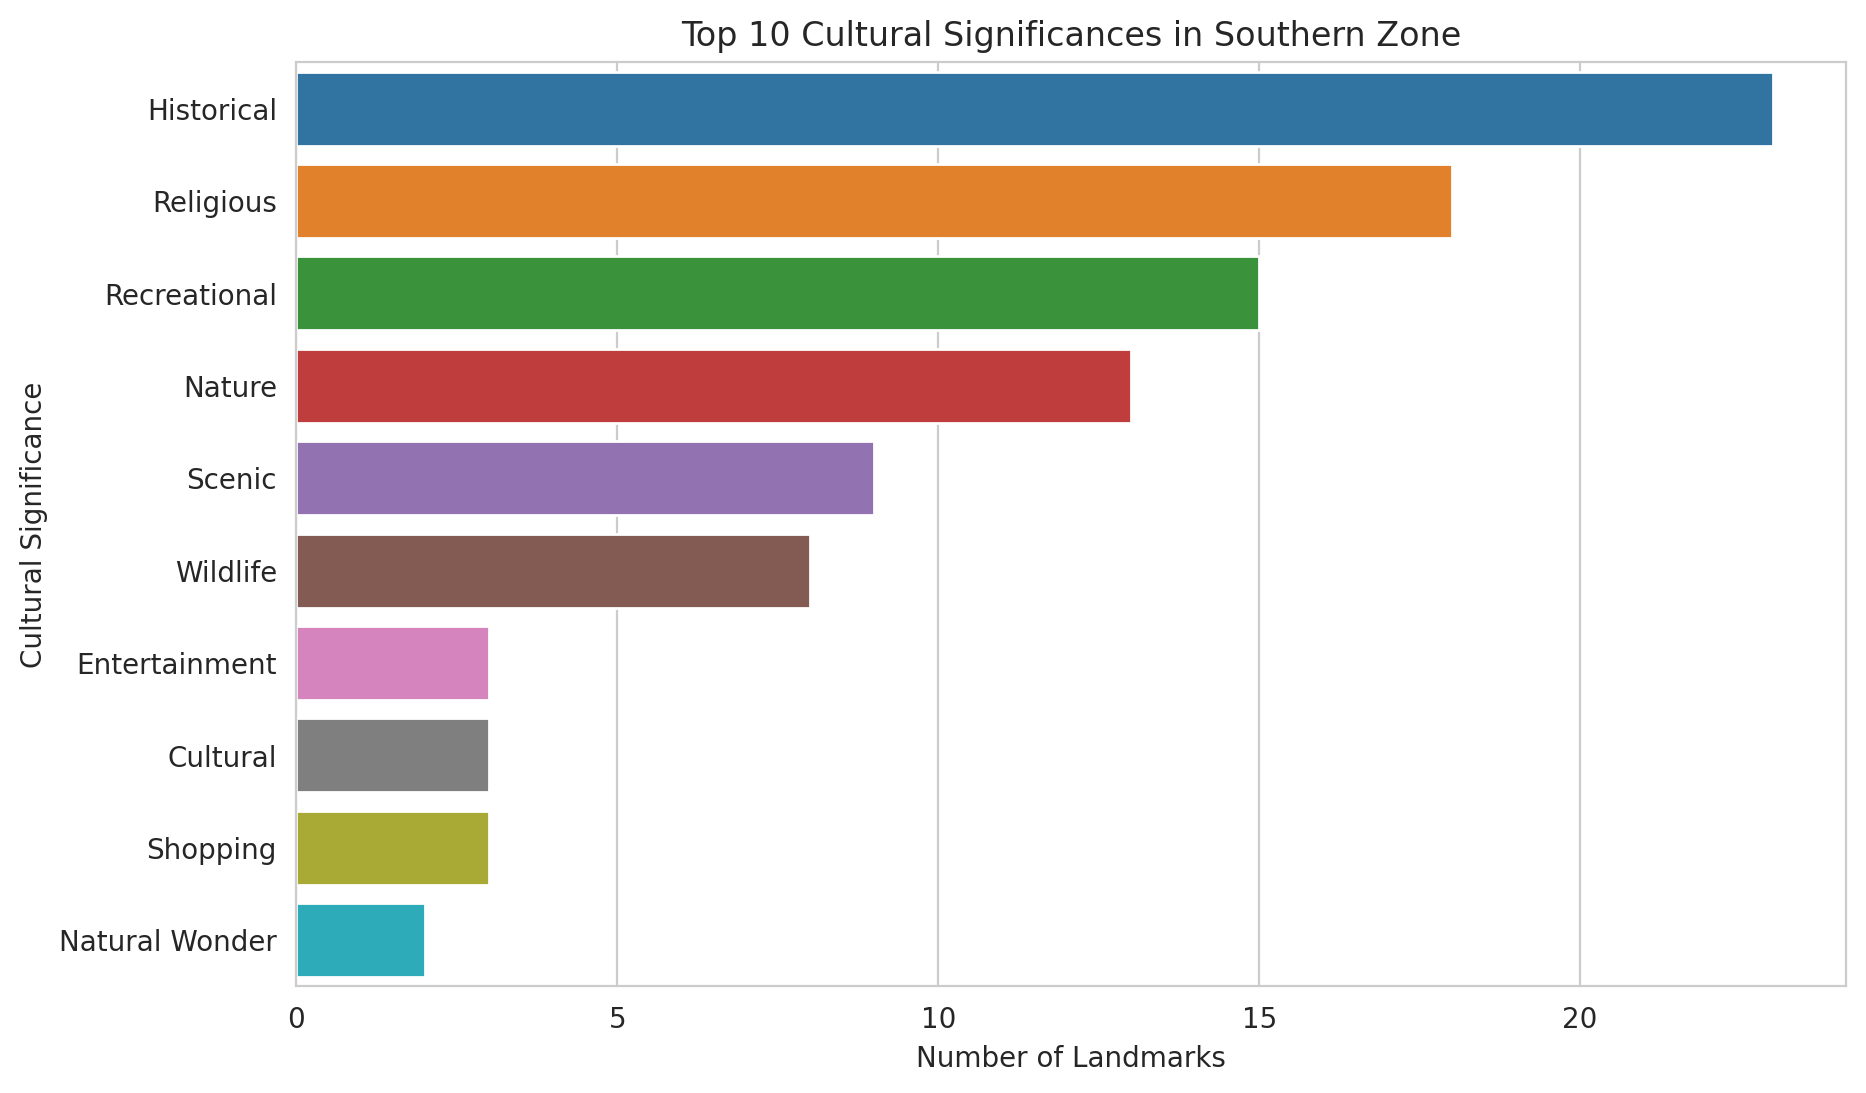

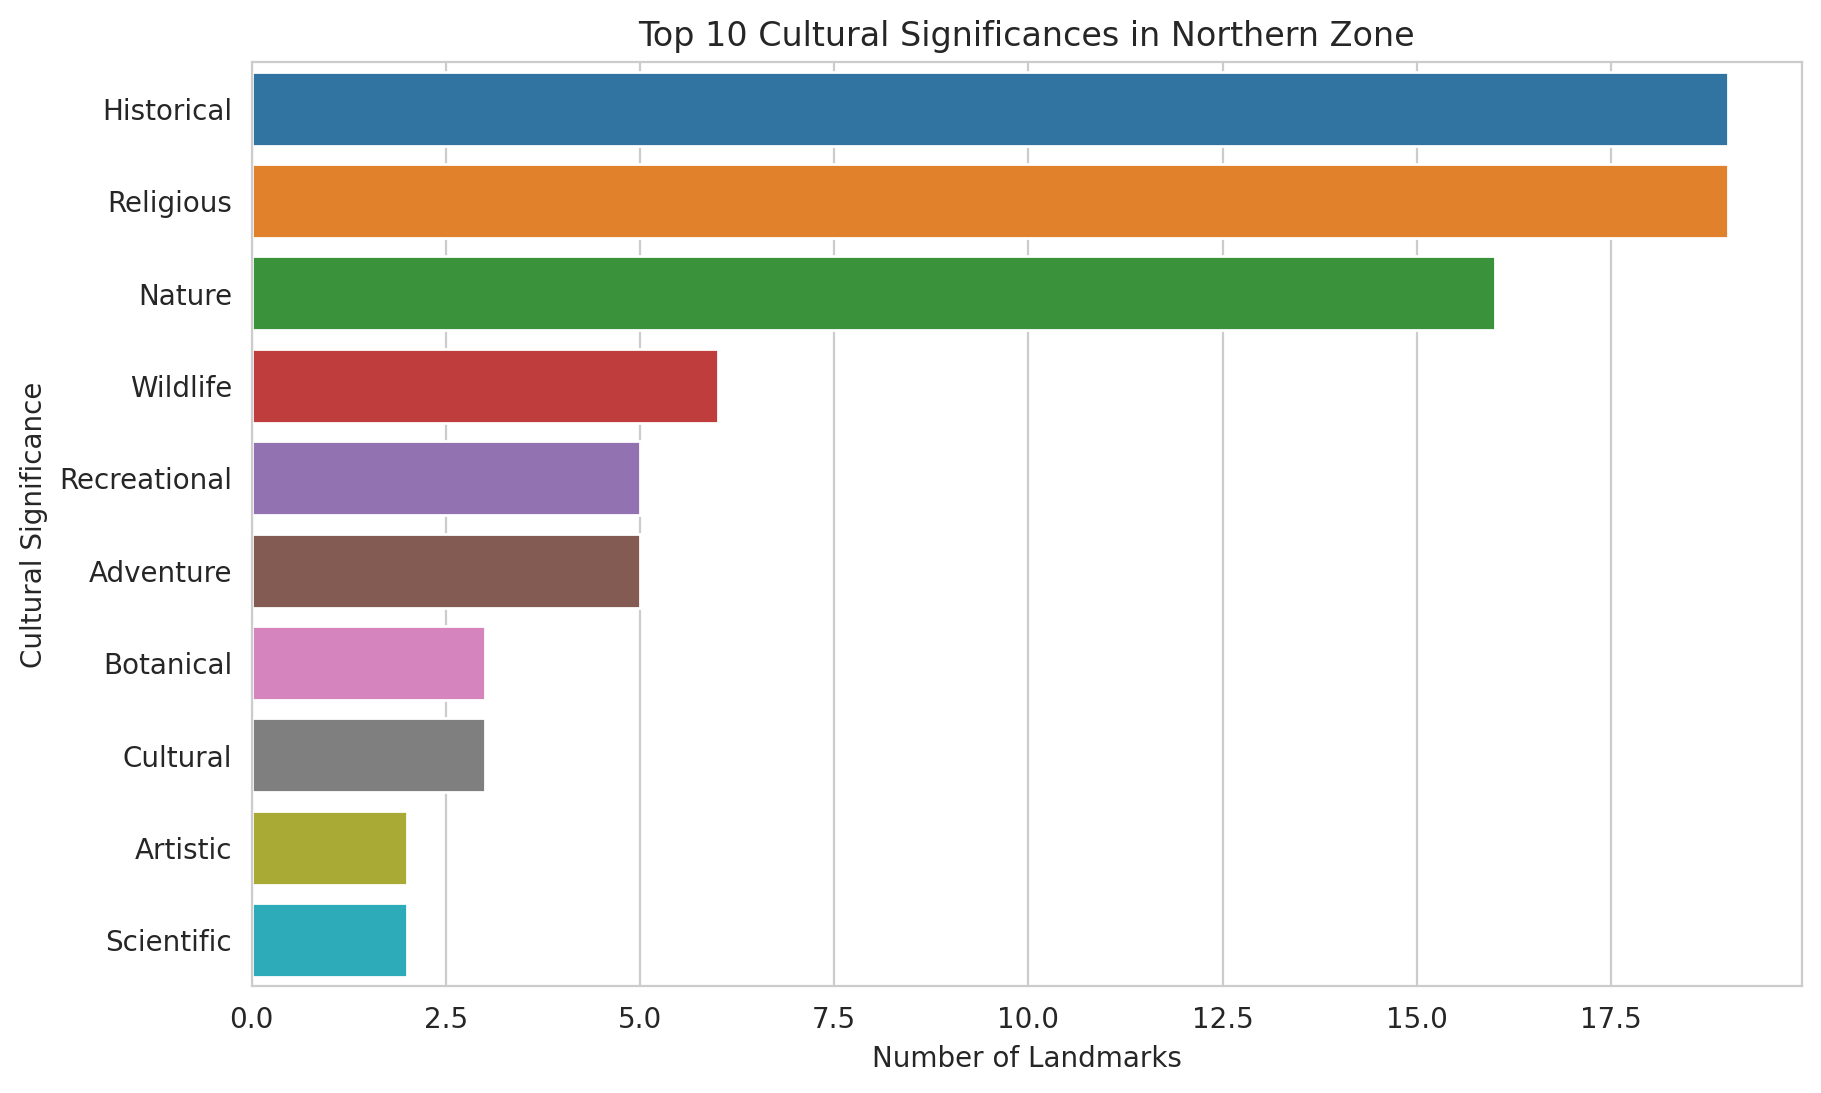

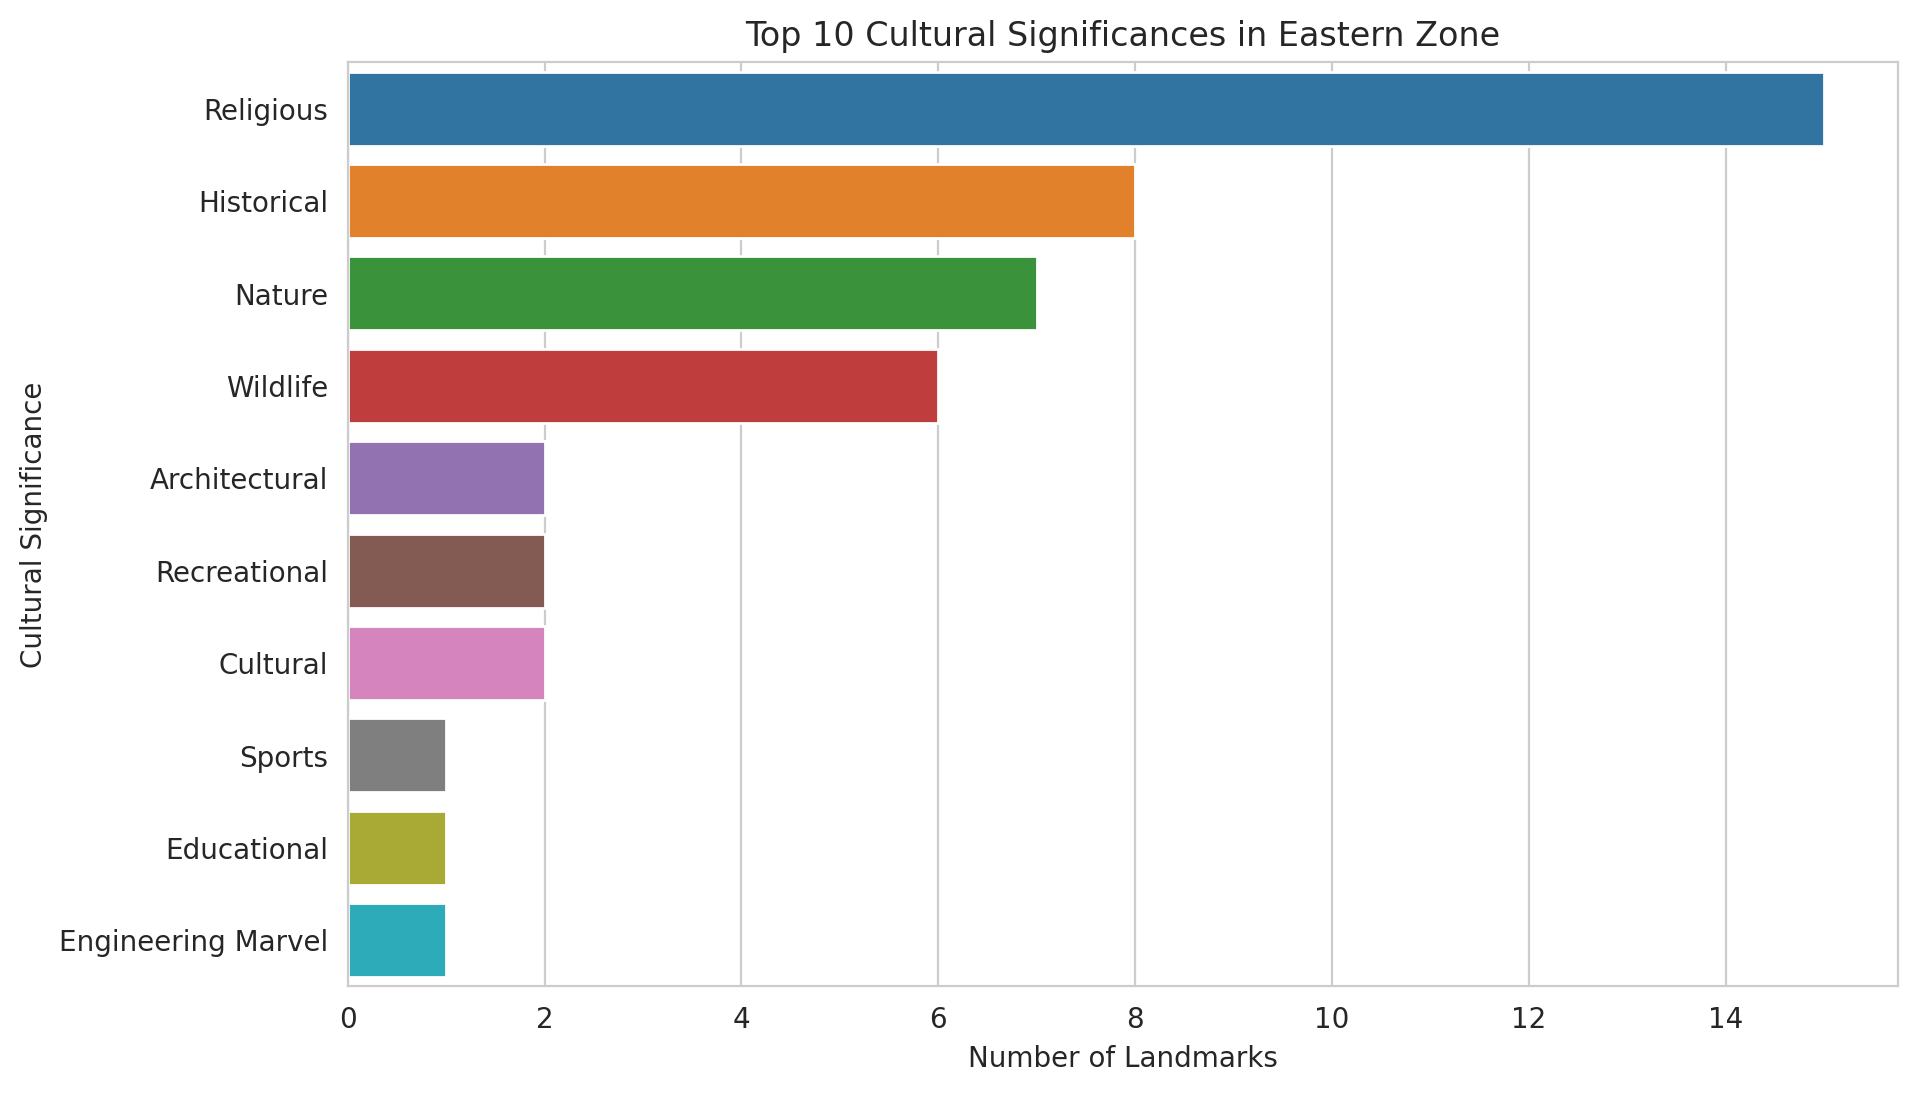

In [10]:
# Distribution of Landmarks by Cultural Significance
significance_counts = data_cleaned['Significance'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=significance_counts, y=significance_counts.index)
plt.title('Distribution of Landmarks by Cultural Significance')
plt.xlabel('Number of Landmarks')
plt.ylabel('Cultural Significance')
plt.show()

# For a more detailed analysis, let's also look at the distribution of cultural significance within the top 3 zones based on the number of landmarks
top_3_zones = data_cleaned['Zone'].value_counts().head(3).index
for zone in top_3_zones:
    plt.figure(figsize=(10, 6), dpi=200)
    zone_data = data_cleaned[data_cleaned['Zone'] == zone]
    zone_significance_count = zone_data['Significance'].value_counts().head(10)
    sns.barplot(x=zone_significance_count, y=zone_significance_count.index)
    plt.title(f'Top 10 Cultural Significances in {zone} Zone')
    plt.xlabel('Number of Landmarks')
    plt.ylabel('Cultural Significance')
    plt.show()


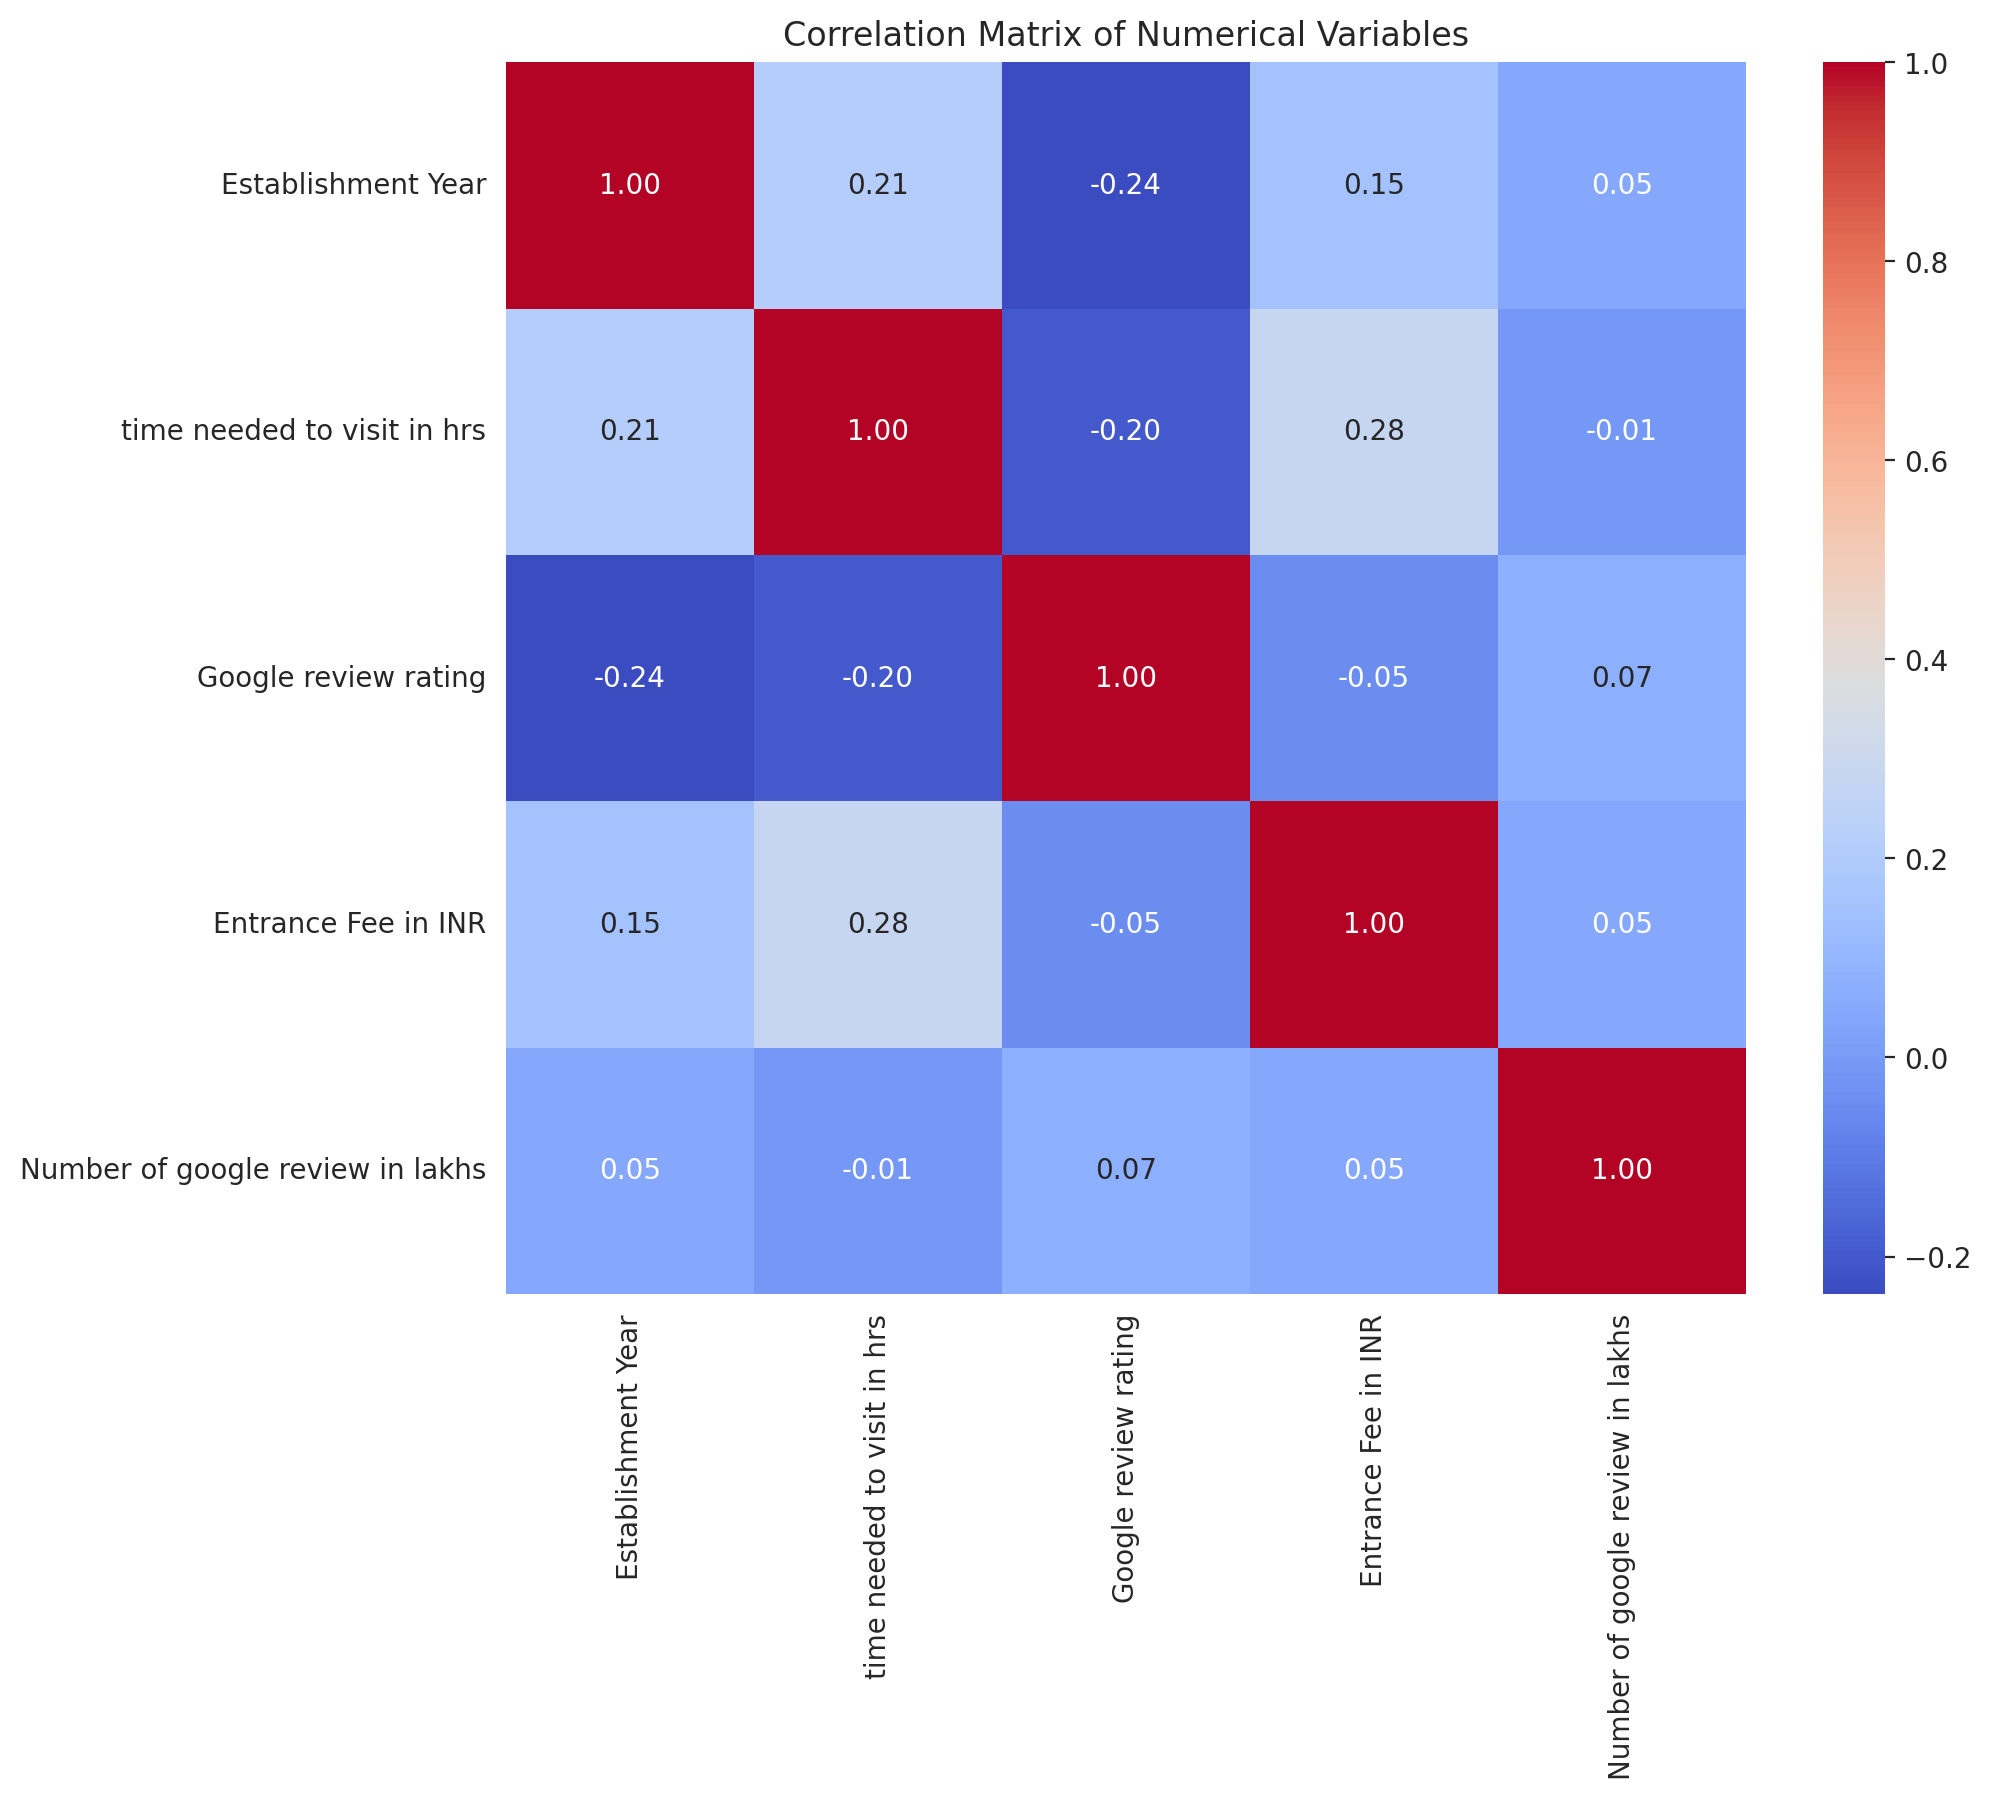

In [11]:
# Select relevant numerical variables for correlation analysis
numerical_data = data_cleaned[['Establishment Year', 'time needed to visit in hrs', 'Google review rating', 'Entrance Fee in INR', 'Number of google review in lakhs']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()
